# **MODELO DE REGRESI√ìN: Flight Prices by date**

Alumnas:
1. Leilani
2. Luc√≠a
3. Natalia
4. Maria Jose
5. Maryam

### Dataset: [Flight Prices by date](https://www.kaggle.com/datasets/juhyounglee1127/flight-prices)

In [ ]:
# Importaci√≥n de librer√≠as necesarias

## Manejo de datos
import pandas as pd
import numpy as np
from datetime import datetime
import os

## Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split

## Modelado
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Evaluaci√≥n de modelos
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, silhouette_score, calinski_harabasz_score
)

## Estad√≠stica y validaci√≥n
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
# Download latest version
import kagglehub

path = kagglehub.dataset_download("juhyounglee1127/flight-prices")

# Find the CSV file within the downloaded directory
csv_file = next((f for f in os.listdir(path) if f.endswith('.csv')), None)

# If a CSV file is found, construct the full file path
if csv_file:
    file_path = os.path.join(path, csv_file)

    # Pandas DataFrame
    df = pd.read_csv(file_path)

    print("DataFrame shape:", df.shape)
    print("DataFrame head:\n", df.head())
else:
    print("No CSV file found in the downloaded directory.")

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.00M/3.00M [00:00<00:00, 136MB/s]

Extracting files...


DataFrame shape: (317260, 11)
DataFrame head:
   Searched Date       Departure Date         Arrival Date  \
0    2024-06-30  2024-07-16 23:48:00  2024-07-17 15:03:00   
1    2024-06-30  2024-07-16 09:34:00  2024-07-16 19:43:00   
2    2024-06-30  2024-07-16 23:48:00  2024-07-17 15:03:00   
3    2024-06-30  2024-07-16 08:30:00  2024-07-16 19:37:00   
4    2024-06-30  2024-07-16 07:00:00  2024-07-16 16:36:00   

   Flight Lands Next Day Departure Airport Arrival Airport  Number Of Stops  \
0                      1               LAS             BOS                1   
1                      0               LAS             BOS                1   
2                      1               LAS             BOS                1   
3                      0               LAS             BOS                1   
4                      0               LAS             BOS                1   

  Route            Airline          Cabin Price  
0   ATL    Spirit Airlines        Economy   $83  
1   EWR    

### Exploraci√≥n de Datos

Tambi√©n se ha guardado el archivo en nuestra carpeta compartida. El archivo se llama *flights.csv*

1. Lectura de datos e informaci√≥n b√°sica

In [ ]:
file_id = "1wU8kL9dk7btZUspLfcmRA2SCVvm6At0Z"
download_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_url)
# Muestra los datos
df.head()

Searched Date       Departure Date         Arrival Date  \
0    2024-06-30  2024-07-16 23:48:00  2024-07-17 15:03:00   
1    2024-06-30  2024-07-16 09:34:00  2024-07-16 19:43:00   
2    2024-06-30  2024-07-16 23:48:00  2024-07-17 15:03:00   
3    2024-06-30  2024-07-16 08:30:00  2024-07-16 19:37:00   
4    2024-06-30  2024-07-16 07:00:00  2024-07-16 16:36:00   

   Flight Lands Next Day Departure Airport Arrival Airport  Number Of Stops  \
0                      1               LAS             BOS                1   
1                      0               LAS             BOS                1   
2                      1               LAS             BOS                1   
3                      0               LAS             BOS                1   
4                      0               LAS             BOS                1   

  Route            Airline          Cabin Price  
0   ATL    Spirit Airlines        Economy   $83  
1   EWR    Spirit Airlines        Economy  $100  
2   ATL    Spirit Airlines        Economy   $78  
3   IAH    Spirit Airlines        Economy  $100  
4   ORD  American Airlines  Basic Economy  $148

o	**Searched Date**: Fecha en la que se busc√≥ el vuelo.

o	**Departure Date**: Fecha de salida del vuelo.

o	**Arrival Date**: Fecha de llegada del vuelo.

o	**Flight Lands Next Day**: Indica si el vuelo llega al d√≠a siguiente. Si un vuelo aterriza al d√≠a siguiente, puede indicar un viaje m√°s largo o que incluye escalas significativas. Esto podr√≠a correlacionarse con el precio, ya que vuelos m√°s largos o con escalas suelen tener precios diferentes a vuelos directos y m√°s cortos.

o	**Departure Airport y Arrival Airport**: Aeropuertos de origen y destino.

o	**Number Of Stops**: N√∫mero de escalas.

o	**Route**: Ruta completa del vuelo (puede combinar origen y destino).Si esta est√° vac√≠a es porque es vyelo directo.

o	**Airline**: Aerol√≠nea.

o	**Cabin**: Clase de cabina (econ√≥mica, business, etc.).

o	**Price**: Precio del vuelo (variable objetivo).


Los datos de los vuelos de salida son de estos siguientes aeropuertos de U.S.A:

In [ ]:
# Get the unique airline names using pd.unique()
unique_airlines = pd.unique(df['Departure Airport'])
print(unique_airlines)

['LAS' 'LAX' 'SFO' 'BOS' 'JFK' 'ORD']


Los aeropuertos de salida y llegada. La data es de estos 6 aeropuertos y los destinos tambi√©n.

LAS: Aeropuerto Internacional Harry Reid, Las Vegas, Nevada.

LAX: Aeropuerto Internacional de Los √Ångeles, California.

SFO: Aeropuerto Internacional de San Francisco, California.

BOS: Aeropuerto Internacional Logan, Boston, Massachusetts.

JFK: Aeropuerto Internacional John F. Kennedy, Nueva York.

ORD: Aeropuerto Internacional O'Hare, Chicago, Illinois.

**Los destinos:**

In [ ]:
# Agrupar por aerol√≠nea y obtener destinos √∫nicos
destinos_por_aerolinea = df.groupby('Departure Airport')['Arrival Airport'].unique().reset_index()

# Renombrar la columna para mayor claridad
destinos_por_aerolinea.rename(columns={'destination': 'unique_destinations'}, inplace=True)

print(destinos_por_aerolinea)

  Departure Airport            Arrival Airport
0               BOS  [LAX, LAS, JFK, SFO, ORD]
1               JFK  [ORD, BOS, LAS, LAX, SFO]
2               LAS  [BOS, JFK, LAX, ORD, SFO]
3               LAX  [ORD, BOS, LAS, SFO, JFK]
4               ORD  [LAX, LAS, SFO, BOS, JFK]
5               SFO  [JFK, BOS, LAX, LAS, ORD]


Informaci√≥n general del dataaset.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317260 entries, 0 to 317259
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Searched Date          317260 non-null  object
 1   Departure Date         317260 non-null  object
 2   Arrival Date           317260 non-null  object
 3   Flight Lands Next Day  317260 non-null  int64 
 4   Departure Airport      317260 non-null  object
 5   Arrival Airport        317260 non-null  object
 6   Number Of Stops        317260 non-null  int64 
 7   Route                  278863 non-null  object
 8   Airline                317260 non-null  object
 9   Cabin                  317260 non-null  object
 10  Price                  317260 non-null  object
dtypes: int64(2), object(9)
memory usage: 26.6+ MB
None


2. Manejo de valores nulos y duplicados

In [ ]:
df.isna().sum() # df.isnull().sum()

Searched Date                0
Departure Date               0
Arrival Date                 0
Flight Lands Next Day        0
Departure Airport            0
Arrival Airport              0
Number Of Stops              0
Route                    38397
Airline                      0
Cabin                        0
Price                        0
dtype: int64

Variable **Route**

Route vac√≠o, significa que es un vuelo directo sin escalas.

In [ ]:
df['Route'] = df['Route'].fillna("Directa") # HAY RUTA DIRECTA

## Limpieza y transformaci√≥n de datos

> Adicionar aspas



### a. Price

Se limpia la columna precio, eliminando cualquier car√°cter no num√©rico.

In [ ]:
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True)

Convertir la columna de precio a num√©rica

In [ ]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

### b. Searched Date' & Departure Date & Arrival Date'

Estas variables deber√≠an convertirse a formato fecha. (datetime)

In [ ]:
df['Searched Date'] = pd.to_datetime(df['Searched Date'])
df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])

In [ ]:
print(df[['Searched Date', 'Departure Date','Arrival Date', 'Price']].head())

  Searched Date      Departure Date        Arrival Date  Price
0    2024-06-30 2024-07-16 23:48:00 2024-07-17 15:03:00     83
1    2024-06-30 2024-07-16 09:34:00 2024-07-16 19:43:00    100
2    2024-06-30 2024-07-16 23:48:00 2024-07-17 15:03:00     78
3    2024-06-30 2024-07-16 08:30:00 2024-07-16 19:37:00    100
4    2024-06-30 2024-07-16 07:00:00 2024-07-16 16:36:00    148


### c. Nueva variable: 'Days Before Departure'

`Days Before Departure = Departure Date - Searched Date.`

Es conocido que los precios de los vuelos suelen ser m√°s bajos cuando se compran con mayor antelaci√≥n, pero tienden a subir dr√°sticamente cerca de la fecha de salida. Por tanto, saber el n√∫mero de d√≠as antes del vuelo (Days Before Departure) ayuda a capturar esta din√°mica de precio.

In [ ]:
# 'Days Before Departure'
df['Days Before Departure'] = (df['Departure Date'] - df['Searched Date']).dt.days

In [ ]:
# Derivar caracter√≠sticas √∫tiles
df['Day of Week_departure'] = df['Departure Date'].dt.day_name()  # D√≠a de la semana (nombre completo)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week_departure'] = pd.Categorical(df['Day of Week_departure'], categories=order, ordered=True)

df['Month_departure'] = df['Departure Date'].dt.month  # N√∫mero del mes
df['Season_departure'] = df['Departure Date'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})  # Asignar temporada seg√∫n el mes

# Mostrar el DataFrame resultante
print(df.head(10).to_markdown())

|    | Searched Date       | Departure Date      | Arrival Date        |   Flight Lands Next Day | Departure Airport   | Arrival Airport   |   Number Of Stops | Route   | Airline           | Cabin         |   Price |   Days Before Departure | Day of Week_departure   |   Month_departure | Season_departure   |
|---:|:--------------------|:--------------------|:--------------------|------------------------:|:--------------------|:------------------|------------------:|:--------|:------------------|:--------------|--------:|------------------------:|:------------------------|------------------:|:-------------------|
|  0 | 2024-06-30 00:00:00 | 2024-07-16 23:48:00 | 2024-07-17 15:03:00 |                       1 | LAS                 | BOS               |                 1 | ATL     | Spirit Airlines   | Economy       |      83 |                      16 | Tuesday                 |                 7 | Summer             |
|  1 | 2024-06-30 00:00:00 | 2024-07-16 09:34:00 | 2024-07-16 19:43:00

### d. Nueva variable:  `Flight Duration `

`Flight Duration = Arrival Date - Departure Date`

Los vuelos m√°s largos suelen ser m√°s costosos debido al mayor consumo de combustible, tiempo de tripulaci√≥n, y log√≠stica.
Sin embargo, puede haber excepciones: algunas rutas largas (con pocas demandas) pueden ser m√°s econ√≥micas.

Diferenciar entre vuelos cortos, medianos y largos puede mejorar la precisi√≥n del modelo.

In [ ]:
df['Flight Duration'] = (df['Arrival Date'] - df['Departure Date']).dt.total_seconds() / 3600

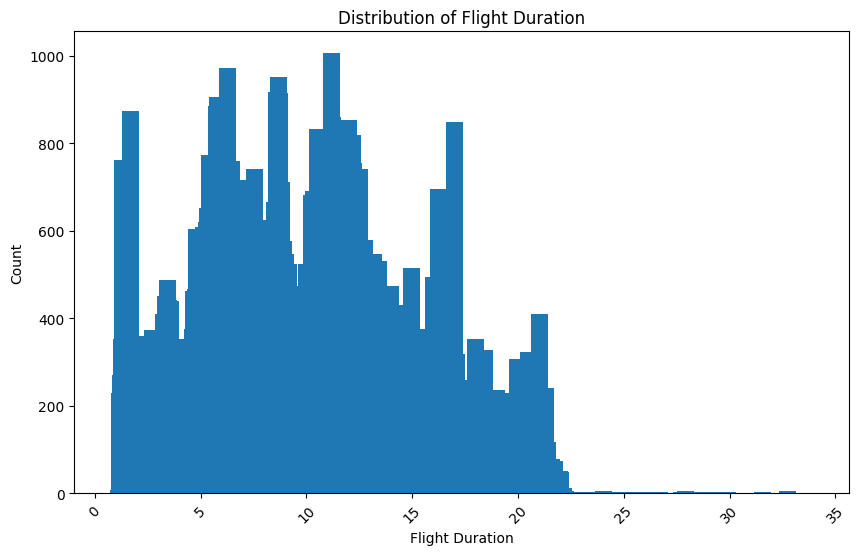

In [ ]:
# Contar la frecuencia de cada duraci√≥n de vuelo
duration_counts = df["Flight Duration"].value_counts().sort_index()

# Crear el gr√°fico de barras
plt.figure(figsize=(10, 6))
plt.bar(duration_counts.index, duration_counts.values)
plt.xlabel("Flight Duration")
plt.ylabel("Count")
plt.title("Distribution of Flight Duration")
plt.xticks(rotation=45)
plt.show()

Se puede observar que existen vuelos muy largos por lo que se verificar√°.

In [ ]:
# Agrupar por combinaci√≥n √∫nica de aeropuertos y calcular la duraci√≥n m√≠nima y m√°xima del vuelo
result = df.groupby(['Departure Airport', 'Arrival Airport'])['Flight Duration'].agg(['min', 'max']).reset_index()

# Renombrar columnas
result.columns = ['Departure Airport', 'Arrival Airport', 'Min Flight Duration', 'Max Flight Duration']
result

Departure Airport Arrival Airport  Min Flight Duration  Max Flight Duration
0                BOS             JFK             1.200000            29.016667
1                BOS             LAS             2.733333            27.900000
2                BOS             LAX             3.150000            31.566667
3                BOS             ORD             1.716667            11.800000
4                BOS             SFO             3.450000            29.366667
5                JFK             BOS             1.100000            33.600000
6                JFK             LAS             2.483333            16.133333
7                JFK             LAX             2.750000            25.200000
8                JFK             ORD             1.650000            10.400000
9                JFK             SFO             3.150000            24.016667
10               LAS             BOS             7.933333            33.183333
11               LAS             JFK             7.766667            26.116667
12               LAS             LAX             1.166667            21.066667
13               LAS             ORD             5.566667            26.433333
14               LAS             SFO             1.483333            21.300000
15               LAX             BOS             8.250000            32.750000
16               LAX             JFK             8.266667            22.066667
17               LAX             LAS             1.116667            32.883333
18               LAX             ORD             5.966667            23.650000
19               LAX             SFO             1.316667            30.200000
20               ORD             BOS             3.183333            28.333333
21               ORD             JFK             3.133333            26.083333
22               ORD             LAS             1.800000            26.683333
23               ORD             LAX             2.266667            28.366667
24               ORD             SFO             2.583333            26.466667
25               SFO             BOS             5.900000            29.933333
26               SFO             JFK             8.350000            22.116667
27               SFO             LAS             1.433333            12.200000
28               SFO             LAX             1.400000             7.600000
29               SFO             ORD             5.950000            25.616667

Se puede observar que existen vuelos bien largos, pero esto puede deberse a que existen vuelos con varias escalas que podr√≠an tomar mucha horas por lo que tiene sentido. Ahora se observar√° si existen vuelos con muchas horas de espera en rutas directas es decir con 0 n√∫mero de escalas.

In [ ]:
# Filtrar solo vuelos sin escalas
df2 = df[df['Number Of Stops'] == 0].copy()

# Agrupar por combinaci√≥n √∫nica de aeropuertos y calcular la duraci√≥n m√≠nima y m√°xima del vuelo
result = df2.groupby(['Departure Airport', 'Arrival Airport'])['Flight Duration'].agg(['min', 'max']).reset_index()

# Renombrar columnas
result.columns = ['Departure Airport', 'Arrival Airport', 'Min Flight Duration', 'Max Flight Duration']
result

Departure Airport Arrival Airport  Min Flight Duration  Max Flight Duration
0                BOS             JFK             1.200000             1.700000
1                BOS             LAS             2.733333             3.266667
2                BOS             LAX             3.150000             3.866667
3                BOS             ORD             1.716667             2.116667
4                BOS             SFO             3.450000             4.016667
5                JFK             BOS             1.100000             1.816667
6                JFK             LAS             2.483333             3.033333
7                JFK             LAX             2.750000             3.683333
8                JFK             ORD             1.650000             2.166667
9                JFK             SFO             3.150000             3.883333
10               LAS             BOS             7.933333             8.533333
11               LAS             JFK             7.766667             8.616667
12               LAS             LAX             1.166667             1.416667
13               LAS             ORD             5.566667             5.816667
14               LAS             SFO             1.483333             1.816667
15               LAX             BOS             8.333333             8.833333
16               LAX             JFK             8.266667             9.066667
17               LAX             LAS             1.116667             1.383333
18               LAX             ORD             5.966667             6.333333
19               LAX             SFO             1.316667             1.583333
20               ORD             BOS             3.183333             3.833333
21               ORD             JFK             3.133333             3.783333
22               ORD             LAS             1.800000             2.300000
23               ORD             LAX             2.266667             2.816667
24               ORD             SFO             2.583333             2.883333
25               SFO             BOS             8.433333             9.000000
26               SFO             JFK             8.350000             9.166667
27               SFO             LAS             1.433333             1.933333
28               SFO             LAX             1.400000             1.700000
29               SFO             ORD             5.950000             6.450000

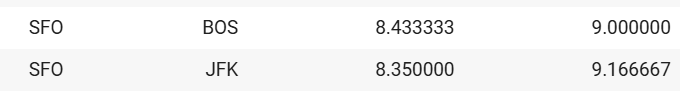

Seg√∫n nuestra base de datos, se observa que el tiempo de un vuelo sin escalas de San Francisco International Airport (SFO) a Boston Logan International Airport (BOS) dura como m√≠nimo 8.4 horas y como m√°ximo 9 horas. Sin embargo, al averiguar el tiempo de vuelo sin escalas de San Francisco International Airport (SFO) a Boston Logan International Airport (BOS) suele estar entre 5 horas y 30 minutos y 6 horas, dependiendo de las condiciones del viento y la aerol√≠nea. Por tanto, se observa un error.

Otro ejemplo es el siguiente:


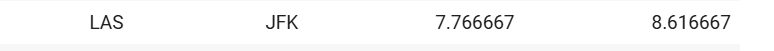

El tiempo de vuelo sin escalas desde Las Vegas (LAS - Harry Reid International Airport) a Nueva York (JFK - John F. Kennedy International Airport) suele estar entre 4 horas y 45 minutos y 5 horas y 30 minutos, dependiendo de la aerol√≠nea, las condiciones del viento y la ruta espec√≠fica. Por tanto, los datos est√°n errados o puede haber otro motivo.

Al observar la data se encuentra que s√≠ hay algunas inconsistencias en los tiempos de vuelo que llaman la atenci√≥n:

- BOS - LAS (2.73 - 3.26 horas) y BOS - LAX (3.15 - 3.87 horas)

Estos valores parecen extra√±amente bajos. Un vuelo directo de Boston (BOS) a Las Vegas (LAS) normalmente dura alrededor de 5 horas, y a Los √Ångeles (LAX) unas 6 horas.

- JFK - LAS (2.48 - 3.03 horas) y JFK - LAX (2.75 - 3.68 horas)

Un vuelo directo de Nueva York (JFK) a Las Vegas (LAS) dura aproximadamente 5 horas y 30 minutos.

- De JFK a Los √Ångeles (LAX) deber√≠a durar unas 6 horas.
Estos valores son demasiado bajos, lo que sugiere que hay un error en la base de datos.

- LAS - BOS (7.93 - 8.53 horas) y LAS - JFK (7.76 - 8.61 horas)

Estos tiempos son excesivamente altos para vuelos directos.
Un vuelo de Las Vegas a Boston o Las Vegas a JFK deber√≠a tomar unas 5 horas.
Esto sugiere que se est√°n considerando vuelos con escalas o que los tiempos han sido mal registrados.

- ORD - LAS (1.8 - 2.3 horas) y ORD - LAX (2.27 - 2.82 horas)

El tiempo de vuelo de Chicago (ORD) a Las Vegas (LAS) suele estar entre 3h 30min y 4h, por lo que el valor en la tabla es demasiado bajo.
Lo mismo ocurre con ORD - LAX, que normalmente dura unas 4h 30min.

- SFO - BOS (8.43 - 9.00 horas) y SFO - JFK (8.35 - 9.17 horas)
Estos valores son demasiado altos. Normalmente, un vuelo directo de San Francisco (SFO) a Boston (BOS) o SFO a JFK dura aproximadamente 5h 30min a 6h.
Estos valores sugieren que se han incluido vuelos con escalas.

Conclusi√≥n:

Parece que los datos est√°n incorrectos y posiblemente reflejan valores err√≥neos o vuelos con una escala en el c√°lculo.

Por oto lado, se ha pensado que las diferencias de huso horario pueden afectar los datos si los tiempos de vuelo se calculan en base a las horas locales de salida y llegada, en lugar del tiempo total de vuelo en horas reales.

Vuelos de Este a Oeste (Ejemplo: BOS ‚Üí LAX, JFK ‚Üí LAS)

Cuando viajas de la costa Este (Eastern Time, UTC-5) a la costa Oeste (Pacific Time, UTC-8), el reloj en el destino muestra un horario 3 horas antes.
Si el tiempo de vuelo real es 6 horas, pero se calcula restando la hora de llegada menos la hora de salida (en hora local), el resultado parecer√≠a ser 3 horas, lo que explicar√≠a los valores anormalmente bajos.

Vuelos de Oeste a Este (Ejemplo: LAX ‚Üí BOS, LAS ‚Üí JFK)

Aqu√≠ ocurre lo contrario. Viajar de la costa Oeste a la costa Este significa que el reloj avanza 3 horas en el destino. Un vuelo real de 5 horas podr√≠a parecer de 8 horas si se usa la diferencia entre horas locales.



Por tanto, debido a que tenemos los horarios de salida y llegada, calcularemos  la duraci√≥n real restando los tiempos en UTC en lugar de las horas locales.


In [ ]:

import pytz
# Diccionario con los husos horarios de los aeropuertos m√°s comunes
timezones = {
    'BOS': 'America/New_York',
    'JFK': 'America/New_York',
    'LAX': 'America/Los_Angeles',
    'LAS': 'America/Los_Angeles',
    'ORD': 'America/Chicago',
    'SFO': 'America/Los_Angeles'
}

# Convertir a datetime y ajustar a UTC
def convert_to_utc(row):
    dep_tz = pytz.timezone(timezones.get(row['Departure Airport'], 'UTC'))
    arr_tz = pytz.timezone(timezones.get(row['Arrival Airport'], 'UTC'))

    dep_time = dep_tz.localize(pd.to_datetime(row['Departure Date']))
    arr_time = arr_tz.localize(pd.to_datetime(row['Arrival Date']))

    dep_time_utc = dep_time.astimezone(pytz.utc)
    arr_time_utc = arr_time.astimezone(pytz.utc)

    return (arr_time_utc - dep_time_utc).total_seconds() / 3600  # Convertir a horas

# Aplicar la correcci√≥n de duraci√≥n
df['Corrected Flight Duration'] = df.apply(convert_to_utc, axis=1)

# Agrupar por combinaci√≥n √∫nica de aeropuertos y calcular la duraci√≥n m√≠nima y m√°xima del vuelo
result = df.groupby(['Departure Airport', 'Arrival Airport'])['Corrected Flight Duration'].agg(['min', 'max']).reset_index()

# Renombrar columnas
result.columns = ['Departure Airport', 'Arrival Airport', 'Min Flight Duration', 'Max Flight Duration']

In [ ]:
result

Departure Airport Arrival Airport  Min Flight Duration  Max Flight Duration
0                BOS             JFK             1.200000             1.700000
1                BOS             LAS             2.733333             3.266667
2                BOS             LAX             3.150000             3.866667
3                BOS             ORD             1.716667             2.116667
4                BOS             SFO             3.450000             4.016667
5                JFK             BOS             1.100000             1.816667
6                JFK             LAS             2.483333             3.033333
7                JFK             LAX             2.750000             3.683333
8                JFK             ORD             1.650000             2.166667
9                JFK             SFO             3.150000             3.883333
10               LAS             BOS             7.933333             8.533333
11               LAS             JFK             7.766667             8.616667
12               LAS             LAX             1.166667             1.416667
13               LAS             ORD             5.566667             5.816667
14               LAS             SFO             1.483333             1.816667
15               LAX             BOS             8.333333             8.833333
16               LAX             JFK             8.266667             9.066667
17               LAX             LAS             1.116667             1.383333
18               LAX             ORD             5.966667             6.333333
19               LAX             SFO             1.316667             1.583333
20               ORD             BOS             3.183333             3.833333
21               ORD             JFK             3.133333             3.783333
22               ORD             LAS             1.800000             2.300000
23               ORD             LAX             2.266667             2.816667
24               ORD             SFO             2.583333             2.883333
25               SFO             BOS             8.433333             9.000000
26               SFO             JFK             8.350000             9.166667
27               SFO             LAS             1.433333             1.933333
28               SFO             LAX             1.400000             1.700000
29               SFO             ORD             5.950000             6.450000

**BOS ‚Üí LAS (Antes: ~3h, Ahora: ~5.7h - 6.3h):** Ahora refleja correctamente un vuelo directo de Boston a Las Vegas, que t√≠picamente toma unas 5h 30m a 6h.

**JFK ‚Üí LAX (Antes: ~3h, Ahora: ~5.7h - 6.7h):** Un vuelo sin escalas de Nueva York (JFK) a Los √Ångeles (LAX) suele tomar alrededor de 6 horas, por lo que los valores ahora son correctos.

**LAS ‚Üí BOS (Antes: ~8h, Ahora: ~4.9h - 5.5h):** Antes el vuelo era demasiado largo, probablemente debido a la diferencia horaria. Ahora, el rango coincide con la duraci√≥n real.

**ORD ‚Üí LAX (Antes: ~2h, Ahora: ~4.2h - 4.8h):** Chicago (ORD) a Los √Ångeles (LAX) realmente toma entre 4h y 5h, as√≠ que ahora el valor est√° corregido.

**SFO ‚Üí BOS (Antes: ~8h, Ahora: ~5.4h - 6h):** Este vuelo suele durar unas 5h 30m a 6h, por lo que ahora los datos tienen sentido.


En general, ahora los tiempos de vuelo parecen mucho m√°s razonables y alineados con los tiempos de vuelo reales. En conclusi√≥n, las correcciones de zona horaria resolvieron el problema. Ahora los valores reflejan duraciones reales de vuelos sin escalas y ya no existen valoresores absurdamente cortos ni excesivamente largos, lo que indica que los datos ahora son m√°s confiables.

In [ ]:
df

Searched Date      Departure Date        Arrival Date  \
0         2024-06-30 2024-07-16 23:48:00 2024-07-17 15:03:00   
1         2024-06-30 2024-07-16 09:34:00 2024-07-16 19:43:00   
2         2024-06-30 2024-07-16 23:48:00 2024-07-17 15:03:00   
3         2024-06-30 2024-07-16 08:30:00 2024-07-16 19:37:00   
4         2024-06-30 2024-07-16 07:00:00 2024-07-16 16:36:00   
...              ...                 ...                 ...   
317255    2024-06-29 2024-07-16 13:10:00 2024-07-16 23:53:00   
317256    2024-06-29 2024-07-16 06:20:00 2024-07-16 17:02:00   
317257    2024-06-29 2024-07-16 23:30:00 2024-07-17 10:17:00   
317258    2024-06-29 2024-07-16 10:50:00 2024-07-17 00:18:00   
317259    2024-06-29 2024-07-16 12:00:00 2024-07-16 23:54:00   

        Flight Lands Next Day Departure Airport Arrival Airport  \
0                           1               LAS             BOS   
1                           0               LAS             BOS   
2                           1               LAS             BOS   
3                           0               LAS             BOS   
4                           0               LAS             BOS   
...                       ...               ...             ...   
317255                      0               LAS             BOS   
317256                      0               LAS             BOS   
317257                      1               LAS             BOS   
317258                      1               LAS             BOS   
317259                      0               LAS             BOS   

        Number Of Stops Route            Airline          Cabin  Price  \
0                     1   ATL    Spirit Airlines        Economy     83   
1                     1   EWR    Spirit Airlines        Economy    100   
2                     1   ATL    Spirit Airlines        Economy     78   
3                     1   IAH    Spirit Airlines        Economy    100   
4                     1   ORD  American Airlines  Basic Economy    148   
...                 ...   ...                ...            ...    ...   
317255                1   DEN    United Airlines  Basic Economy    219   
317256                1   PHX  American Airlines  Basic Economy    218   
317257                1   IAD    United Airlines        Economy    198   
317258                1   JFK            JetBlue     Blue Basic    154   
317259                1   IAH    United Airlines        Economy    228   

        Days Before Departure Day of Week_departure  Month_departure  \
0                          16               Tuesday                7   
1                          16               Tuesday                7   
2                          16               Tuesday                7   
3                          16               Tuesday                7   
4                          16               Tuesday                7   
...                       ...                   ...              ...   
317255                     17               Tuesday                7   
317256                     17               Tuesday                7   
317257                     17               Tuesday                7   
317258                     17               Tuesday                7   
317259                     17               Tuesday                7   

       Season_departure  Flight Duration  Corrected Flight Duration  
0                Summer        15.250000                  12.250000  
1                Summer        10.150000                   7.150000  
2                Summer        15.250000                  12.250000  
3                Summer        11.116667                   8.116667  
4                Summer         9.600000                   6.600000  
...                 ...              ...                        ...  
317255           Summer        10.716667                   7.716667  
317256           Summer        10.700000                   7.700000  
317257           Summer        10.783333         

In [ ]:
df.drop('Flight Duration', axis=1, inplace=True)

# Cambiar el nombre de la columna 'Airline' a 'Airline Name'
df.rename(columns={"Corrected Flight Duration": "Flight Duration"}, inplace=True)

### f. Cabina

In [ ]:
# Agrupar por aerol√≠nea y obtener los tipos de cabina √∫nicos
cabinas_por_aerolinea = df.groupby('Airline')['Cabin'].unique().reset_index()

# Renombrar la columna para mayor claridad
cabinas_por_aerolinea.rename(columns={'cabin_type': 'unique_cabin_types'}, inplace=True)

cabinas_por_aerolinea

Airline  \
0                          Alaska Airlines   
1                            Allegiant Air   
2            Allegiant Air, Breeze Airways   
3           Allegiant Air, Spirit Airlines   
4           Allegiant Air, Sun Country Air   
5                        American Airlines   
6          Avelo Airlines, Spirit Airlines   
7                                  Avianca   
8                 Avianca, Spirit Airlines   
9          Breeze Airways, Spirit Airlines   
10                                Cape Air   
11               Cape Air, United Airlines   
12                                   Delta   
13  Denver Air Connection, Sun Country Air   
14                                Frontier   
15               Frontier, Spirit Airlines   
16                       Hawaiian Airlines   
17                                 JetBlue   
18                       Multiple airlines   
19                         Porter Airlines   
20    Southern / Mokulele, Spirit Airlines   
21    Southern / Mokulele, Sun Country Air   
22                         Spirit Airlines   
23          Spirit Airlines, Allegiant Air   
24         Spirit Airlines, Avelo Airlines   
25                Spirit Airlines, Avianca   
26         Spirit Airlines, Breeze Airways   
27                Spirit Airlines, Contour   
28               Spirit Airlines, Frontier   
29    Spirit Airlines, Southern / Mokulele   
30        Spirit Airlines, Sun Country Air   
31    Spirit Airlines, Volaris El Salvador   
32                Spirit Airlines, WestJet   
33                         Sun Country Air   
34          Sun Country Air, Allegiant Air   
35        Sun Country Air, Porter Airlines   
36        Sun Country Air, Spirit Airlines   
37                Sun Country Air, WestJet   
38                        TAP AIR PORTUGAL   
39                         United Airlines   
40               United Airlines, Cape Air   
41                             VivaAerobus   
42                                 Volaris   
43    Volaris El Salvador, Spirit Airlines   
44                                 WestJet   
45                WestJet, Sun Country Air   

                                                Cabin  
0                                [Saver, Main, First]  
1                                           [Economy]  
2                                           [Economy]  
3                                           [Economy]  
4                                           [Economy]  
5   [Basic Economy, Main Cabin, Main Cabin Flex, M...  
6                                           [Economy]  
7                                           [Economy]  
8                                           [Economy]  
9                                      [No Flex Fare]  
10                                          [Economy]  
11                           [Basic Economy, Economy]  
12      [Basic Economy, Main Cabin, Comfort +, First]  
13                                          [Economy]  
14                       [Economy, Standard, BizFare]  
15                                         [Standard]  
16                     [Main Cabin Basic, Main Cabin]  
17  [Blue Basic, Blue, Mint, Blue Refundable, Econ...  
18                            [Economy, No Flex Fare]  
19                              [PorterClassic Basic]  
20                                          [Economy]  
21                                          [Economy]  
22                                          [Economy]  
23                                          [Economy]  
24                                          [Economy]  
25                                          [Economy]  
26                                          [Economy]  
27                                          [Economy]  
28                                         [Standard]  
29                                          [Economy]  
30                                          [Economy]  
31                                          [Economy]  
32                      

In [ ]:
# Get the unique airline names using pd.unique()
unique_airlines = pd.unique(df['Cabin'])
print(unique_airlines)

['Economy' 'Basic Economy' 'Blue Basic' 'Saver' 'Standard' 'Main Cabin'
 'Blue' 'Main' 'First' 'Mint' 'UltraBasic' 'Economy Plus'
 'Blue Refundable' 'BizFare' 'Business/First' 'Main Cabin Basic'
 'Main Cabin Flex' 'No Flex Fare' 'Premium Economy' 'Main Select'
 'PorterClassic Basic' 'Discount' 'Comfort +'
 'Business/First (fully refundable)' 'Mixed' 'Economy (fully refundable)']


Como tenemos muchas categor√≠as, agrupamos las categor√≠as en clases principales para simplificar el an√°lisis.



In [ ]:
# Calcular el precio promedio por categor√≠a
category_price = df.groupby('Cabin')['Price'].mean().reset_index()

# Ordenar por precio promedio de menor a mayor
category_price = category_price.sort_values(by='Price', ascending=True)

# Mostrar las categor√≠as ordenadas con sus medias
category_list = category_price.values.tolist()
for category, price in category_list:
    print(f"{category}: {price:.2f}")

# Tambi√©n puedes retornar las listas ordenadas si deseas trabajar con ellas
ordered_categories = category_price['Cabin'].tolist()
ordered_means = category_price['Price'].tolist()
print("\nCategor√≠as ordenadas:", ordered_categories)
print("Medias ordenadas:", ordered_means)

Standard: 173.03
Blue Basic: 191.00
BizFare: 196.32
No Flex Fare: 206.97
Basic Economy: 225.81
Blue: 337.23
Economy: 338.03
Mixed: 365.50
Main Select: 381.00
Saver: 384.45
Blue Refundable: 402.72
PorterClassic Basic: 403.98
Comfort +: 424.67
UltraBasic: 503.13
Main Cabin: 537.94
Premium Economy: 624.87
Economy Plus: 659.08
Main: 671.06
Main Cabin Basic: 672.25
Main Cabin Flex: 810.43
Business/First: 823.53
First: 941.91
Mint: 1438.54
Discount: 1730.00
Business/First (fully refundable): 2009.67
Economy (fully refundable): 2550.00

Categor√≠as ordenadas: ['Standard', 'Blue Basic', 'BizFare', 'No Flex Fare', 'Basic Economy', 'Blue', 'Economy', 'Mixed', 'Main Select', 'Saver', 'Blue Refundable', 'PorterClassic Basic', 'Comfort +', 'UltraBasic', 'Main Cabin', 'Premium Economy', 'Economy Plus', 'Main', 'Main Cabin Basic', 'Main Cabin Flex', 'Business/First', 'First', 'Mint', 'Discount', 'Business/First (fully refundable)', 'Economy (fully refundable)']
Medias ordenadas: [173.02706144539957, 

In [ ]:
# Filtrar las filas donde la cabina sea "Discount"
discount_rows = df[df['Cabin'] == 'Discount']

# Mostrar las aerol√≠neas asociadas a "Discount" si hay una columna para aerol√≠neas
if 'Airline' in df.columns:
    print(discount_rows[['Airline', 'Cabin', 'Price']])
else:
    print("No se encontr√≥ una columna 'Airline' en el dataset. Aqu√≠ est√°n las filas filtradas:")
    print(discount_rows)
discount_rows

                 Airline     Cabin  Price
39065   TAP AIR PORTUGAL  Discount   1857
261196  TAP AIR PORTUGAL  Discount   1603


Searched Date      Departure Date        Arrival Date  \
39065     2024-06-29 2024-07-12 18:00:00 2024-07-13 20:05:00   
261196    2024-07-02 2024-07-17 18:00:00 2024-07-18 20:05:00   

        Flight Lands Next Day Departure Airport Arrival Airport  \
39065                       1               ORD             JFK   
261196                      1               ORD             JFK   

        Number Of Stops Route           Airline     Cabin  Price  \
39065                 1   LIS  TAP AIR PORTUGAL  Discount   1857   
261196                1   LIS  TAP AIR PORTUGAL  Discount   1603   

        Days Before Departure Day of Week_departure  Month_departure  \
39065                      13                Friday                7   
261196                     15             Wednesday                7   

       Season_departure  Flight Duration  
39065            Summer        25.083333  
261196           Summer        25.083333

Se elimininar√°n, son solo dos registros con estos datos altos. Esta categor√≠a cuando se ha buscado en la aerolinea no existe por lo que se proceder√° a eliminar estos registros y tampoco existe la ruta.

In [ ]:
# Filtrar y eliminar los registros donde la cabina sea "Discount"
df = df[df['Cabin'] != 'Discount']

Agrupamos las categor√≠as teniendo en cuenta su precio y sus caracter√≠sticas.

In [ ]:
# Crear una funci√≥n para asignar categor√≠as m√°s compactas
def categorize_cabin_detailed(cabin):
    if cabin in ['Standard', 'Blue Basic', 'BizFare', 'No Flex Fare', 'Basic Economy', 'Blue', 'Economy', 'Saver']:
        return 'Economy'
    elif cabin in ['Mixed', 'PorterClassic Basic', 'Blue Refundable', 'Main Select', 'Comfort +',
                   'UltraBasic', 'Main Cabin', 'Premium Economy', 'Economy Plus', 'Main', 'Main Cabin Basic','Economy (fully refundable)']:
        return 'Premium Economy'
    elif cabin in ['Business/First', 'Main Cabin Flex', 'Mint','First','Business/First (fully refundable)']:
        return 'Clase Business/First'
    else:
        return 'Otros'

<ipython-input-31-e7ceb01b19c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin Group'] = df['Cabin'].apply(categorize_cabin_detailed)
<ipython-input-31-e7ceb01b19c8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


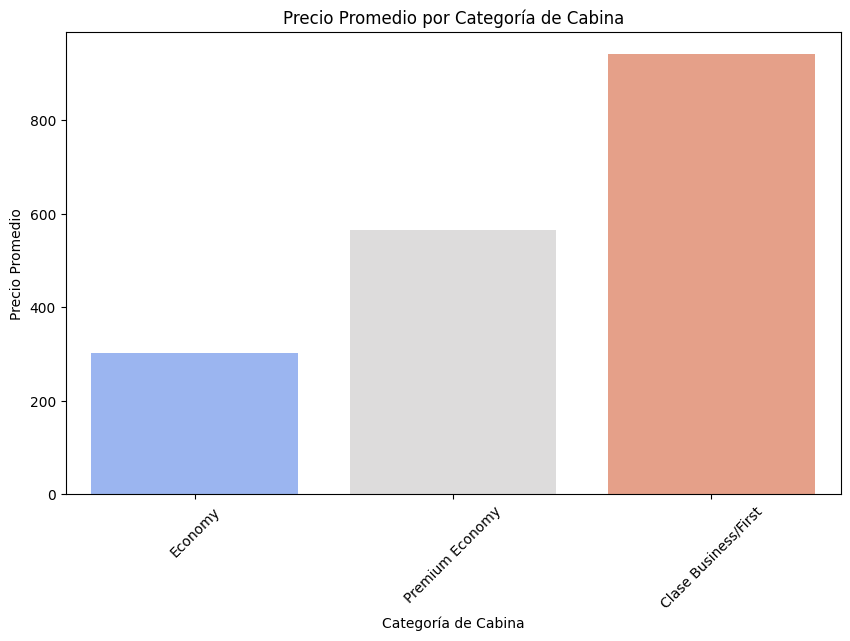

In [ ]:
# Aplicar la funci√≥n de categorizaci√≥n al DataFrame
df['Cabin Group'] = df['Cabin'].apply(categorize_cabin_detailed)

# Calcular el precio promedio por categor√≠a de cabina
category_price = df.groupby('Cabin Group')['Price'].mean().reset_index()

# Ordenar por precio promedio de menor a mayor
category_price = category_price.sort_values(by='Price', ascending=True)

# Graficar las categor√≠as de cabina
plt.figure(figsize=(10, 6))
sns.barplot(
    data=category_price,
    x='Cabin Group',
    y='Price',
    palette='coolwarm'
)
plt.title('Precio Promedio por Categor√≠a de Cabina')
plt.xlabel('Categor√≠a de Cabina')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)  # Rotar etiquetas para legibilidad
plt.show()


In [ ]:
# Verificar si hay valores nulos en la columna 'Cabin Group'
print("Valores nulos en 'Cabin Group':", df['Cabin Group'].isnull().sum())

Valores nulos en 'Cabin Group': 0


In [ ]:
#Eliinar columna que ya no se utilizar√°.
df = df.drop(['Cabin'], axis=1)

### g. Aerol√≠nea:

Se puede observar que existen combinaciones de aerol√≠neas como *Spirit Airlines, Allegiant Air*. Esto sucede porque existen vuelos con escalas que utilizan diferentes aerol√≠neas en conjunto para llegar al destino. Por tanto, a esas combinaciones, se registrar√° como  *Multiple airlines	*

In [ ]:
df.groupby('Airline').size()

Airline
Alaska Airlines                            57136
Allegiant Air                                 15
Allegiant Air, Breeze Airways                 11
Allegiant Air, Spirit Airlines                39
Allegiant Air, Sun Country Air                11
American Airlines                          51746
Avelo Airlines, Spirit Airlines               10
Avianca                                      419
Avianca, Spirit Airlines                      14
Breeze Airways, Spirit Airlines               25
Cape Air                                      84
Cape Air, United Airlines                    476
Delta                                      55578
Denver Air Connection, Sun Country Air         5
Frontier                                    3747
Frontier, Spirit Airlines                      9
Hawaiian Airlines                             15
JetBlue                                    14882
Multiple airlines                             11
Porter Airlines                               41
Southern / Mokulele, Spirit Airlines          21
Southern / Mokulele, Sun Country Air           3
Spirit Airlines                            20310
Spirit Airlines, Allegiant Air                57
Spirit Airlines, Avelo Airlines                2
Spirit Airlines, Avianca                       1
Spirit Airlines, Breeze Airways               64
Spirit Airlines, Contour                       5
Spirit Airlines, Frontier                      2
Spirit Airlines, Southern / Mokulele          16
Spirit Airlines, Sun Country Air             844
Spirit Airlines, Volaris El Salvador           2
Spirit Airlines, WestJet                       1
Sun Country Air                             1824
Sun Country Air, Allegiant Air                 8
Sun Country Air, Porter Airlines               2
Sun Country Air, Spirit Airlines            1232
Sun Country Air, WestJet                      47
United Airlines                           108063
United Airlines, Cape Air                    189
VivaAerobus                                   10
Volaris                                      148
Volaris El Salvador, Spirit Airlines           1
WestJet                                      115
WestJet, Sun Country Air                      17
dtype: int64

In [ ]:
df['Airline Type'] = df['Airline'].apply(lambda x: 'Multiple airlines' if ',' in x else x)

In [ ]:
df.groupby('Airline Type').size()

Airline Type
Alaska Airlines       57136
Allegiant Air            15
American Airlines     51746
Avianca                 419
Cape Air                 84
Delta                 55578
Frontier               3747
Hawaiian Airlines        15
JetBlue               14882
Multiple airlines      3125
Porter Airlines          41
Spirit Airlines       20310
Sun Country Air        1824
United Airlines      108063
VivaAerobus              10
Volaris                 148
WestJet                 115
dtype: int64

In [ ]:
df

Searched Date      Departure Date        Arrival Date  \
0         2024-06-30 2024-07-16 23:48:00 2024-07-17 15:03:00   
1         2024-06-30 2024-07-16 09:34:00 2024-07-16 19:43:00   
2         2024-06-30 2024-07-16 23:48:00 2024-07-17 15:03:00   
3         2024-06-30 2024-07-16 08:30:00 2024-07-16 19:37:00   
4         2024-06-30 2024-07-16 07:00:00 2024-07-16 16:36:00   
...              ...                 ...                 ...   
317255    2024-06-29 2024-07-16 13:10:00 2024-07-16 23:53:00   
317256    2024-06-29 2024-07-16 06:20:00 2024-07-16 17:02:00   
317257    2024-06-29 2024-07-16 23:30:00 2024-07-17 10:17:00   
317258    2024-06-29 2024-07-16 10:50:00 2024-07-17 00:18:00   
317259    2024-06-29 2024-07-16 12:00:00 2024-07-16 23:54:00   

        Flight Lands Next Day Departure Airport Arrival Airport  \
0                           1               LAS             BOS   
1                           0               LAS             BOS   
2                           1               LAS             BOS   
3                           0               LAS             BOS   
4                           0               LAS             BOS   
...                       ...               ...             ...   
317255                      0               LAS             BOS   
317256                      0               LAS             BOS   
317257                      1               LAS             BOS   
317258                      1               LAS             BOS   
317259                      0               LAS             BOS   

        Number Of Stops Route            Airline  Price  \
0                     1   ATL    Spirit Airlines     83   
1                     1   EWR    Spirit Airlines    100   
2                     1   ATL    Spirit Airlines     78   
3                     1   IAH    Spirit Airlines    100   
4                     1   ORD  American Airlines    148   
...                 ...   ...                ...    ...   
317255                1   DEN    United Airlines    219   
317256                1   PHX  American Airlines    218   
317257                1   IAD    United Airlines    198   
317258                1   JFK            JetBlue    154   
317259                1   IAH    United Airlines    228   

        Days Before Departure Day of Week_departure  Month_departure  \
0                          16               Tuesday                7   
1                          16               Tuesday                7   
2                          16               Tuesday                7   
3                          16               Tuesday                7   
4                          16               Tuesday                7   
...                       ...                   ...              ...   
317255                     17               Tuesday                7   
317256                     17               Tuesday                7   
317257                     17               Tuesday                7   
317258                     17               Tuesday                7   
317259                     17               Tuesday                7   

       Season_departure  Flight Duration Cabin Group       Airline Type  
0                Summer        12.250000     Economy    Spirit Airlines  
1                Summer         7.150000     Economy    Spirit Airlines  
2                Summer        12.250000     Economy    Spirit Airlines  
3                Summer         8.116667     Economy    Spirit Airlines  
4                Summer         6.600000     Economy  American Airlines  
...                 ...              ...         ...                ...  
317255           Summer         7.716667     Economy    United Airlines  
317256           Summer         7.700000     Economy  American Airlines  
317257           Summer         7.783333     Economy    United Airlines  
317258           Summer        10.466667     Economy            JetBlue  
317259           Summer         8.900000     

In [ ]:
df.drop('Airline', axis=1, inplace=True)

# Cambiar el nombre de la columna 'Airline' a 'Airline Name'
df.rename(columns={"Airline Type": "Airline"}, inplace=True)

### h. Variables categ+oricas

In [ ]:
df.columns

Index(['Searched Date', 'Departure Date', 'Arrival Date',
       'Flight Lands Next Day', 'Departure Airport', 'Arrival Airport',
       'Number Of Stops', 'Route', 'Price', 'Days Before Departure',
       'Day of Week_departure', 'Month_departure', 'Season_departure',
       'Flight Duration', 'Cabin Group', 'Airline'],
      dtype='object')

In [ ]:
# Convertir las variables seleccionadas a tipo categ√≥rico
categorical_vars = [
    'Flight Lands Next Day',
    'Departure Airport',
    'Arrival Airport',
    'Number Of Stops',
    'Route',
    'Airline',
    'Day of Week_departure',
    'Season_departure',
    'Cabin Group'
]

# Convertir a categ√≥ricas
for var in categorical_vars:
    df[var] = df[var].astype('category')

# Verificar la conversi√≥n
print("Variables categ√≥ricas:")
print(df[categorical_vars].dtypes)

# Asegurarse de que las dem√°s variables permanezcan en su tipo original
print("\nOtras variables:")
print(df.drop(columns=categorical_vars).dtypes)


Variables categ√≥ricas:
Flight Lands Next Day    category
Departure Airport        category
Arrival Airport          category
Number Of Stops          category
Route                    category
Airline                  category
Day of Week_departure    category
Season_departure         category
Cabin Group              category
dtype: object

Otras variables:
Searched Date            datetime64[ns]
Departure Date           datetime64[ns]
Arrival Date             datetime64[ns]
Price                             int64
Days Before Departure             int64
Month_departure                   int32
Flight Duration                 float64
dtype: object


## An√°lisis Exploratorio - Relaci√≥n entre variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317258 entries, 0 to 317259
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Searched Date          317258 non-null  datetime64[ns]
 1   Departure Date         317258 non-null  datetime64[ns]
 2   Arrival Date           317258 non-null  datetime64[ns]
 3   Flight Lands Next Day  317258 non-null  category      
 4   Departure Airport      317258 non-null  category      
 5   Arrival Airport        317258 non-null  category      
 6   Number Of Stops        317258 non-null  category      
 7   Route                  317258 non-null  category      
 8   Price                  317258 non-null  int64         
 9   Days Before Departure  317258 non-null  int64         
 10  Day of Week_departure  317258 non-null  category      
 11  Month_departure        317258 non-null  int32         
 12  Season_departure       317258 non-null  category 

In [ ]:
df.describe()

Searched Date                 Departure Date  \
count                         317258                         317258   
mean   2024-06-29 21:34:09.922776064  2024-08-03 09:09:35.155803904   
min              2024-06-27 00:00:00            2024-07-03 00:07:00   
25%              2024-06-28 00:00:00            2024-07-12 11:46:00   
50%              2024-06-30 00:00:00            2024-07-15 10:20:00   
75%              2024-07-02 00:00:00            2024-07-24 07:00:00   
max              2024-07-03 00:00:00            2024-12-11 23:59:00   
std                              NaN                            NaN   

                        Arrival Date          Price  Days Before Departure  \
count                         317258  317258.000000          317258.000000   
mean   2024-08-03 18:35:15.353938688     359.883010              33.981192   
min              2024-07-03 06:30:00      15.000000               6.000000   
25%              2024-07-12 21:18:00     217.000000              12.000000   
50%              2024-07-15 19:47:00     316.000000              15.000000   
75%              2024-07-24 15:14:00     457.000000              22.000000   
max              2024-12-12 21:30:00    3688.000000             167.000000   
std                              NaN     214.944665              45.069664   

       Month_departure  Flight Duration  
count     317258.00000    317258.000000  
mean           7.61102         9.438922  
min            7.00000         1.100000  
25%            7.00000         6.966667  
50%            7.00000         9.083333  
75%            7.00000        11.833333  
max           12.00000        34.566667  
std            1.45804         3.833020

### Price

**Distribuci√≥n de precios**
Analizaremos la distribuci√≥n de la variable Price para entender su rango y forma.

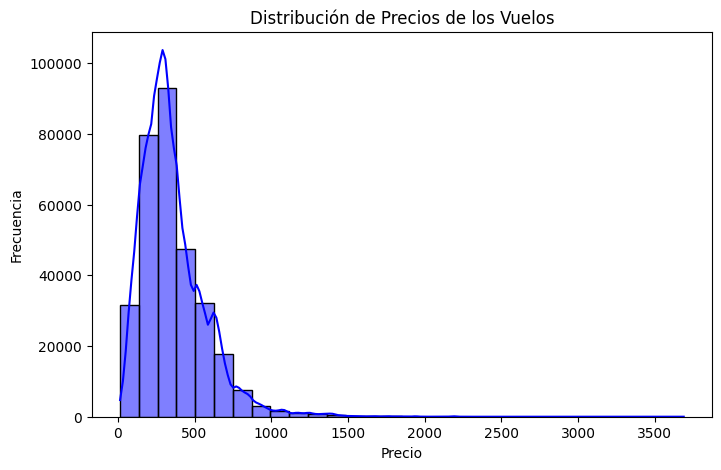

In [ ]:
# Histograma de precios
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=30, color='blue')
plt.title('Distribuci√≥n de Precios de los Vuelos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


identificaci√≥n de outliers

In [ ]:
from scipy.stats import zscore

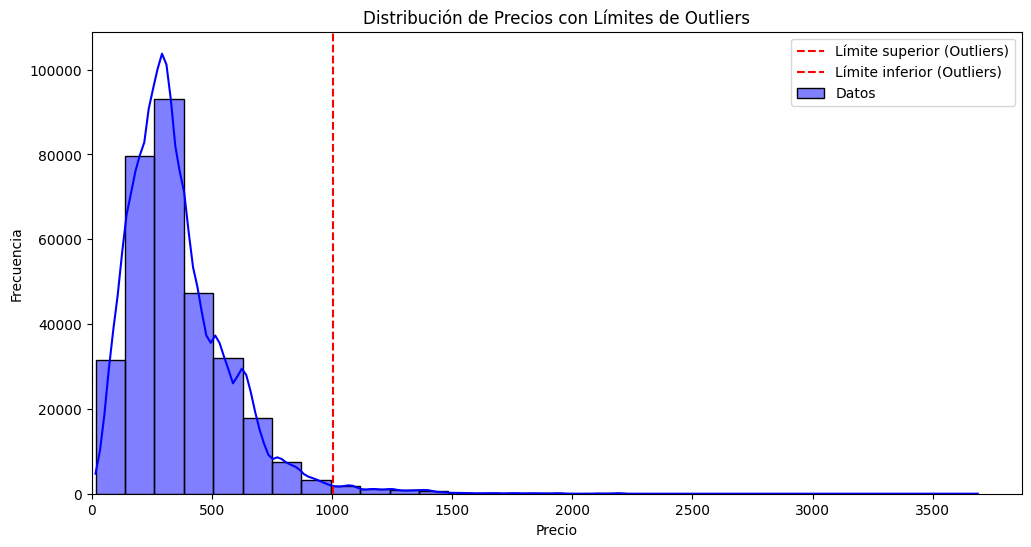

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Calcular el Z-Score para la variable 'Price'
df['Price_zscore'] = zscore(df['Price'])

# Identificar outliers usando el umbral (Z-Score > 3 o < -3)
outliers = df[df['Price_zscore'].abs() > 3]

# Calcular l√≠mites de outliers
upper_limit = df['Price'].mean() + 3 * df['Price'].std()
lower_limit = df['Price'].mean() - 3 * df['Price'].std()

# Filtrar valores negativos si los hubiera (opcional para precios)
df = df[df['Price'] >= 0]

# Graficar histograma con l√≠mites
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue', label='Datos')

# L√≠neas verticales para los l√≠mites de outliers
plt.axvline(x=upper_limit, color='red', linestyle='--', label='L√≠mite superior (Outliers)')
plt.axvline(x=max(lower_limit, 0), color='red', linestyle='--', label='L√≠mite inferior (Outliers)')

plt.title('Distribuci√≥n de Precios con L√≠mites de Outliers')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xlim(left=0)  # Asegurar que el eje X empieza en 0
plt.legend()
plt.show()


In [ ]:
# Crear un nuevo DataFrame excluyendo los outliers
df_no_outliers = df[df['Price_zscore'].abs() <= 3].copy()

# Eliminar la columna 'Price_zscore' del nuevo DataFrame
df_no_outliers.drop(columns=['Price_zscore'], inplace=True)

# Verificar el resultado
print(df_no_outliers.head())  # Muestra las primeras filas del DataFrame sin outliers
print(f"N√∫mero de filas sin outliers: {df_no_outliers.shape[0]}")


  Searched Date      Departure Date        Arrival Date Flight Lands Next Day  \
0    2024-06-30 2024-07-16 23:48:00 2024-07-17 15:03:00                     1   
1    2024-06-30 2024-07-16 09:34:00 2024-07-16 19:43:00                     0   
2    2024-06-30 2024-07-16 23:48:00 2024-07-17 15:03:00                     1   
3    2024-06-30 2024-07-16 08:30:00 2024-07-16 19:37:00                     0   
4    2024-06-30 2024-07-16 07:00:00 2024-07-16 16:36:00                     0   

  Departure Airport Arrival Airport Number Of Stops Route  Price  \
0               LAS             BOS               1   ATL     83   
1               LAS             BOS               1   EWR    100   
2               LAS             BOS               1   ATL     78   
3               LAS             BOS               1   IAH    100   
4               LAS             BOS               1   ORD    148   

   Days Before Departure Day of Week_departure  Month_departure  \
0                     16             

In [ ]:
df=df_no_outliers.copy()

### **Flight Duration**

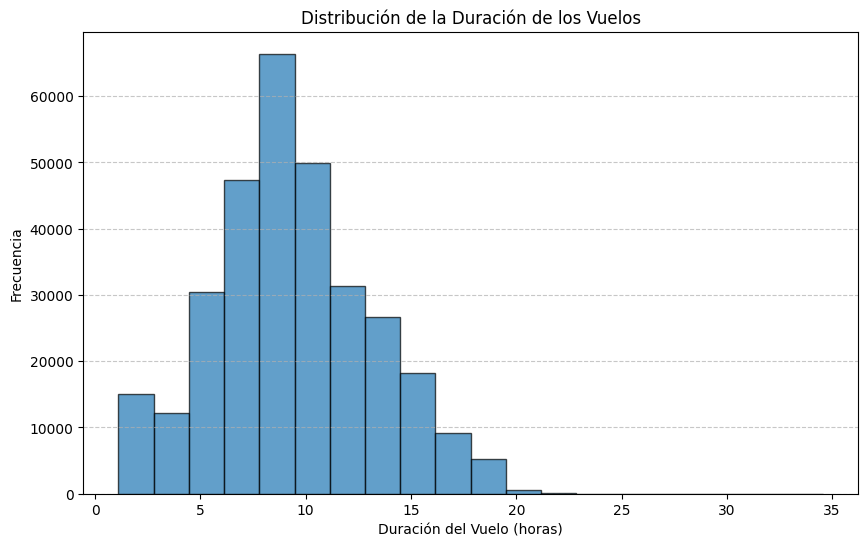

In [ ]:
import matplotlib.pyplot as plt

# Crear el gr√°fico de duraci√≥n de vuelos
plt.figure(figsize=(10, 6))
plt.hist(df['Flight Duration'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Duraci√≥n del Vuelo (horas)')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de la Duraci√≥n de los Vuelos')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gr√°fico
plt.show()


### **Number Of Stops**

**Impacto del n√∫mero de escalas en el precio**:
Analizaremos c√≥mo var√≠a el precio seg√∫n la variable Number Of Stops.

<ipython-input-49-3cbd5625e703>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stops_prices = df.groupby('Number Of Stops')['Price'].mean().reset_index()
<ipython-input-49-3cbd5625e703>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stops_prices, x='Number Of Stops', y='Price', palette='coolwarm')


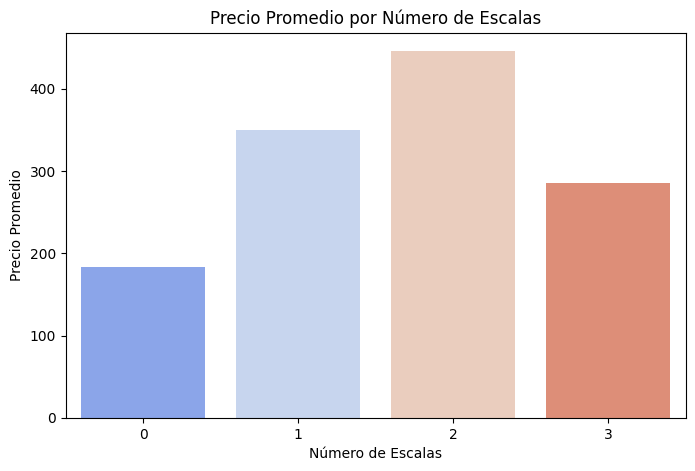

In [ ]:
# Precio promedio por n√∫mero de escalas
stops_prices = df.groupby('Number Of Stops')['Price'].mean().reset_index()

# Gr√°fico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=stops_prices, x='Number Of Stops', y='Price', palette='coolwarm')
plt.title('Precio Promedio por N√∫mero de Escalas')
plt.xlabel('N√∫mero de Escalas')
plt.ylabel('Precio Promedio')
plt.show()


### **Cabin**

**Precio Promedio por Tipo de Cabina**

<ipython-input-50-818e902e2a00>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cabin_price = df.groupby('Cabin Group')['Price'].mean().reset_index()
<ipython-input-50-818e902e2a00>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


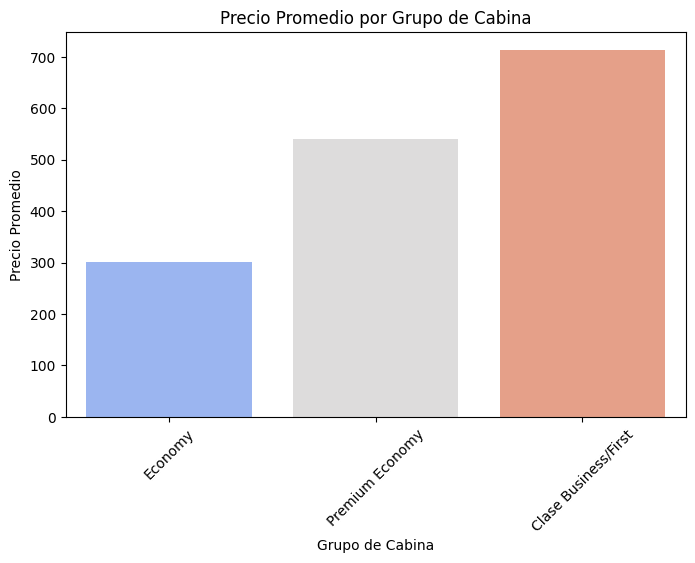

In [ ]:
# Calcular el precio promedio por grupo de cabina
cabin_price = df.groupby('Cabin Group')['Price'].mean().reset_index()

# Ordenar por precio promedio de menor a mayor
cabin_price = cabin_price.sort_values(by='Price', ascending=True)

# Garantizar el orden en el gr√°fico de barras
plt.figure(figsize=(8, 5))
sns.barplot(
    data=cabin_price,
    x='Cabin Group',
    y='Price',
    palette='coolwarm',
    order=cabin_price['Cabin Group']  # Especificar el orden expl√≠cito
)
plt.title('Precio Promedio por Grupo de Cabina')
plt.xlabel('Grupo de Cabina')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.show()


### **Airline**

**Precio promedio por aerol√≠nea:**

<ipython-input-51-08c2c76f9d0d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  airline_price = df.groupby('Airline')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)
<ipython-input-51-08c2c76f9d0d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


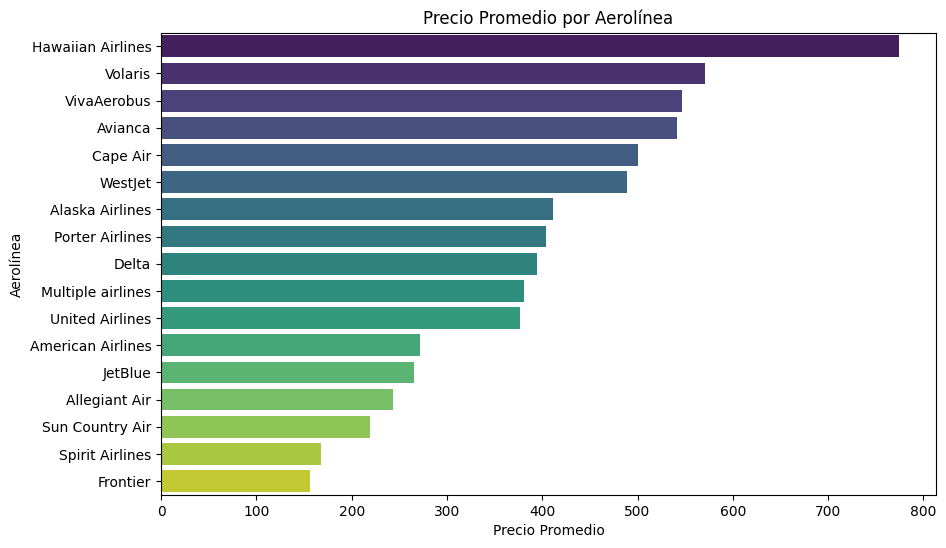

In [ ]:
# Calcular el precio promedio por aerol√≠nea y ordenar de mayor a menor
airline_price = df.groupby('Airline')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)

# Gr√°fico de barras con orden expl√≠cito
plt.figure(figsize=(10, 6))
sns.barplot(
    data=airline_price,
    x='Price',
    y='Airline',
    palette='viridis',
    order=airline_price['Airline']  # Especificar el orden expl√≠cito
)
plt.title('Precio Promedio por Aerol√≠nea')
plt.xlabel('Precio Promedio')
plt.ylabel('Aerol√≠nea')
plt.show()


###**Departure Date:**
De esta variable se puede obtener m√°s variables para el an√°lisis

####  **Days Before Departure**

**Precio promedio y Dias antes de la salida**

In [ ]:
df.columns

Index(['Searched Date', 'Departure Date', 'Arrival Date',
       'Flight Lands Next Day', 'Departure Airport', 'Arrival Airport',
       'Number Of Stops', 'Route', 'Price', 'Days Before Departure',
       'Day of Week_departure', 'Month_departure', 'Season_departure',
       'Flight Duration', 'Cabin Group', 'Airline'],
      dtype='object')

In [ ]:
# Group by 'Days Before Departure' and calculate the average price
flights_summary = df.groupby('Days Before Departure')['Price'].mean().reset_index()

In [ ]:
# Verify the grouping and aggregation
print(flights_summary.head())

   Days Before Departure       Price
0                      6  483.923580
1                      7  367.522985
2                      8  373.879738
3                      9  373.831677
4                     10  368.805324


In [ ]:
# Calculate the correlation between 'Days Before Departure' and 'Price'
correlation = flights_summary[['Days Before Departure', 'Price']].corr().iloc[0, 1]
print(f"Correlation between Days Before Departure and Price: {correlation}")

Correlation between Days Before Departure and Price: -0.7645188019171215


Este valor representa una fuerte correlaci√≥n negativa entre los d√≠as antes de la fecha de salida y el precio del vuelo. Esto significa que, en general, mientras m√°s cerca est√©s de la fecha de salida, mayor ser√° el precio del boleto a√©reo. Este fen√≥meno tiene importantes implicancias para los usuarios que buscan ahorrar dinero al planificar sus viajes.

Las tarifas suelen aumentar dr√°sticamente en los √∫ltimos d√≠as o incluso semanas previas a la salida.


Los precios tambi√©n est√°n influenciados por la temporada alta y baja.

La fuerte correlaci√≥n negativa entre los d√≠as antes de la salida y el precio confirma una regla general de los viajes: planificar con tiempo es la clave para ahorrar dinero en vuelos.

In [ ]:
# Crear una columna con rangos de d√≠as antes de la salida
bins = [0, 7, 14, 21, 30,  float('inf')]  # Incluye un rango superior para valores mayores a 60
labels = ['0-7', '8-14', '15-21', '22-30', '30+']  # Etiquetas que corresponden a los intervalos

# Agregar la columna categ√≥rica al DataFrame
df['Days Range'] = pd.cut(df['Days Before Departure'], bins=bins, labels=labels, include_lowest=True)

# Verificar la distribuci√≥n de los rangos
print("Distribuci√≥n de vuelos por rango de d√≠as:")
print(df['Days Range'].value_counts())


Distribuci√≥n de vuelos por rango de d√≠as:
Days Range
8-14     137499
15-21     88287
30+       55822
22-30     23067
0-7        7977
Name: count, dtype: int64


<ipython-input-57-42b1fa1b9d44>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_range = df.groupby('Days Range')['Price'].mean().reset_index()
<ipython-input-57-42b1fa1b9d44>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_per_range, x='Days Range', y='Price', palette='coolwarm')


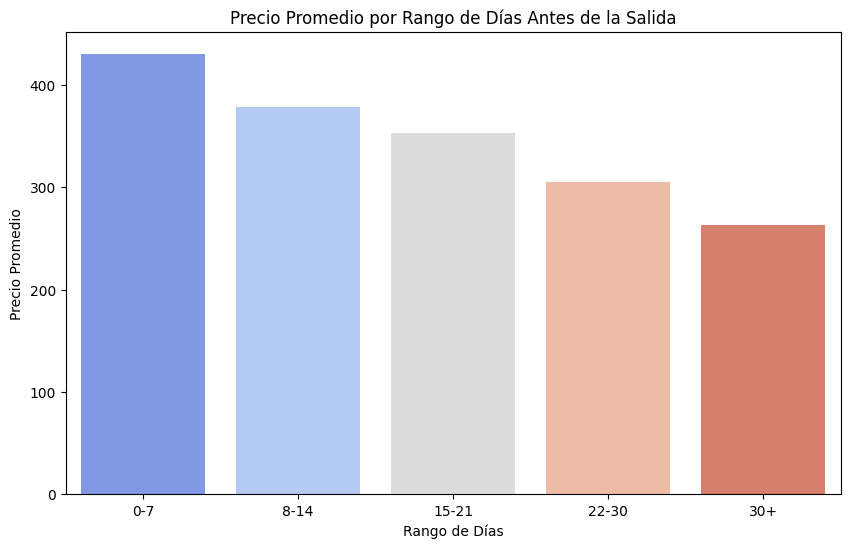

In [ ]:
# Calcular el precio promedio por rango
avg_price_per_range = df.groupby('Days Range')['Price'].mean().reset_index()

# Graficar los precios promedios por rango
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_per_range, x='Days Range', y='Price', palette='coolwarm')
plt.title('Precio Promedio por Rango de D√≠as Antes de la Salida')
plt.xlabel('Rango de D√≠as')
plt.ylabel('Precio Promedio')
plt.show()


In [ ]:
df.drop(['Days Range'], axis=1, inplace=True)

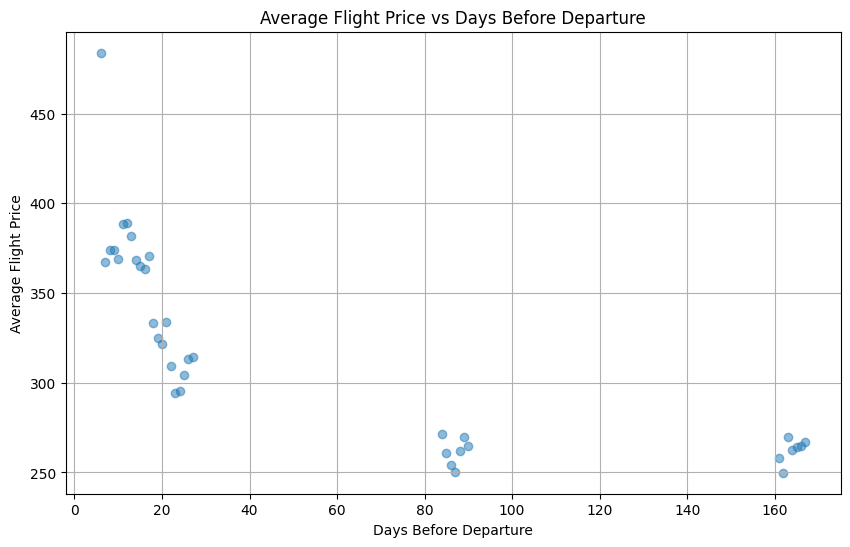

In [ ]:
# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(flights_summary['Days Before Departure'], flights_summary['Price'], alpha=0.5)
plt.title('Average Flight Price vs Days Before Departure')
plt.xlabel('Days Before Departure')
plt.ylabel('Average Flight Price')
plt.grid(True)
plt.show()

Tambi√©n podemos visualizar el precio medio del vuelo por temporadA. Por tanto podr√≠amos crear una nueva variable donde se identifique las estaciones del a√±o teniendo en cuenta que deber√≠an ser las estaciones del a√±o correspondiente a estados unidos.

Primavera: Marzo, abril y mayo.

Verano: Junio, julio y agosto.

Oto√±o: Septiembre, octubre y noviembre.

Invierno: Diciembre, enero y febrero.

#### **Season_departure**

<ipython-input-60-f9a3f2c56761>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Season_departure', y='Price', palette='coolwarm')


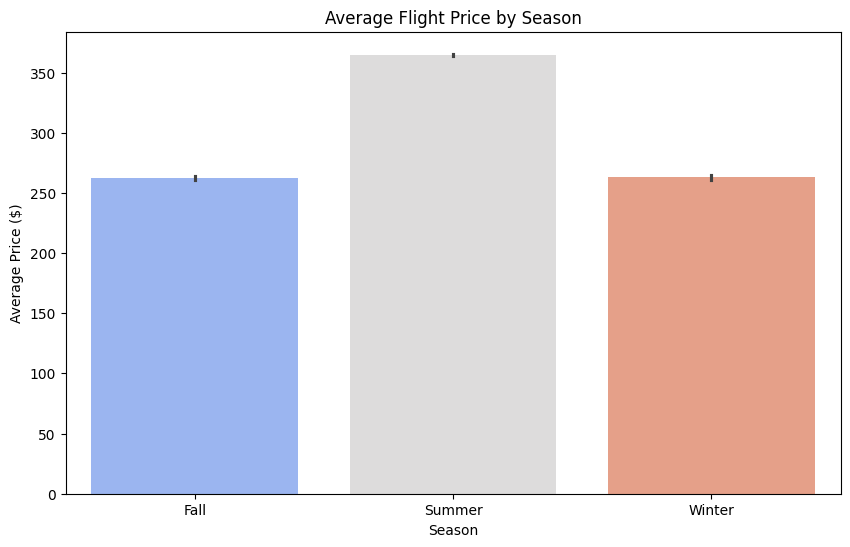

In [ ]:
# Gr√°fico de precios por temporada
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Season_departure', y='Price', palette='coolwarm')
plt.title('Average Flight Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Price ($)')
plt.show()

#### Day of Week_departure

<ipython-input-61-bf4c91971de1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_day = df.groupby('Day of Week_departure')['Price'].mean()


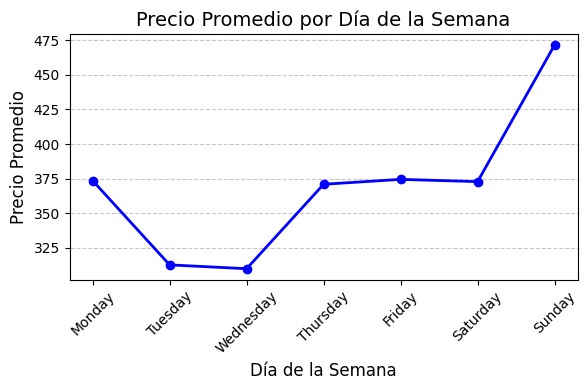

In [ ]:
# Graficar los d√≠as de la semana y el precio promedio
avg_price_by_day = df.groupby('Day of Week_departure')['Price'].mean()


# Graficar con una l√≠nea en lugar de barras
plt.figure(figsize=(6, 4))
avg_price_by_day.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2)

# Configurar etiquetas y t√≠tulo
plt.title('Precio Promedio por D√≠a de la Semana', fontsize=14)
plt.xlabel('D√≠a de la Semana', fontsize=12)
plt.ylabel('Precio Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Los d√≠as m√°s econ√≥micos parecen ser martes y mi√©rcoles, mientras que viernes , s√°bado y domingo  son d√≠as t√≠picamente m√°s caros, con mayor variabilidad de precios.

In [ ]:
df.columns

Index(['Searched Date', 'Departure Date', 'Arrival Date',
       'Flight Lands Next Day', 'Departure Airport', 'Arrival Airport',
       'Number Of Stops', 'Route', 'Price', 'Days Before Departure',
       'Day of Week_departure', 'Month_departure', 'Season_departure',
       'Flight Duration', 'Cabin Group', 'Airline'],
      dtype='object')

### SELECCI√ìN DE VARIABLES

Despu√©s de observar y hacer las tranformaciones necesarias de las variables as√≠ como la creaci√≥n de nuevas, hemos decidido eliminar algunas variables por las siguientes razones.


**Searched Date:** Es redundante porque ya tengo `Days Before Departure`.

**Departure Date:** Es redundante si ya tengo `Season`,` Day of Week` y `Month`.

**Route:** Redundante con Departure Airport, Arrival Airport, y Number Of Stops.Ya que una vez obtenido de donde llega y a d√≥nde va el avi√≥n, junto con su npumero de escalas. Ya no es necesario obtener este dato.

In [ ]:
df2=df.copy()

In [ ]:
df2.drop(['Searched Date', 'Departure Date', 'Route'], axis=1, inplace=True)


**Arrival Date:** No es relevante directamente para predecir precios.


In [ ]:
# Eliminamos 'Arrival Date' porque no es √∫til para regresi√≥n
df2.drop(columns=['Arrival Date'], inplace=True)


**Flight Lands Next Day:** Consecuencia de otras variables.

In [ ]:
df2.drop(columns=['Flight Lands Next Day'], inplace=True)

In [ ]:
df2.columns

Index(['Departure Airport', 'Arrival Airport', 'Number Of Stops', 'Price',
       'Days Before Departure', 'Day of Week_departure', 'Month_departure',
       'Season_departure', 'Flight Duration', 'Cabin Group', 'Airline'],
      dtype='object')

### **EVALUACI√ìN VIF**

Manejar variables categ√≥ricas

In [ ]:
# Aplicar Label Encoding a las columnas categ√≥ricas
for col in df2.select_dtypes(include=['object', 'category']).columns:
    encoder = LabelEncoder()
    df2[col] = encoder.fit_transform(df2[col])

Verificar si exite multicoolinealidad en los datos ya que esto puede afectar en el futuro al modelo.

In [ ]:
# Agregar constante para el c√°lculo del VIF
X_with_constant = add_constant(df2.drop('Price', axis=1))

# Calcular VIF para cada variable
vif_data = pd.DataFrame({
    "Variable": X_with_constant.columns,
    "VIF": [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]
})

# Mostrar resultados
print(vif_data.sort_values(by="VIF", ascending=False))


                 Variable          VIF
0                   const  2488.019907
6         Month_departure   130.312933
4   Days Before Departure   125.366553
7        Season_departure     2.022490
8         Flight Duration     1.742376
3         Number Of Stops     1.724680
5   Day of Week_departure     1.297682
1       Departure Airport     1.102556
2         Arrival Airport     1.094953
9             Cabin Group     1.049586
10                Airline     1.035410


Month_departure (VIF = 130.30):

Es probable que est√© correlacionada con Season_departure, ya que ambas se refieren a per√≠odos de tiempo.  Por tanto, se eliminar√° y nos quedaremos con Season_departure.



Days Before Departure (VIF = 125.32):

Podr√≠a estar correlacionada con otras variables relacionadas con el tiempo, como Month_departure o Day of Week_departure. Esta variable es clave para la predicci√≥n por lo que no se eliminar√° y tomar√° en cuenta las otras variables


Eliminar variables redundantes y recalcular VIF

In [ ]:
df2.drop(['Month_departure'], axis=1, inplace=True)
# El mes est√° relacionacionado con la estaci√≥n. Terner ambas pueden causar multiolinealidad

In [ ]:
# Agregar constante para el c√°lculo del VIF
X_with_constant = add_constant(df2.drop('Price', axis=1))

# Calcular VIF para cada variable
vif_data = pd.DataFrame({
    "Variable": X_with_constant.columns,
    "VIF": [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]
})

# Mostrar resultados
print(vif_data.sort_values(by="VIF", ascending=False))


                Variable        VIF
0                  const  40.644798
7        Flight Duration   1.741970
3        Number Of Stops   1.724311
4  Days Before Departure   1.370903
5  Day of Week_departure   1.227447
6       Season_departure   1.149916
1      Departure Airport   1.102556
2        Arrival Airport   1.094889
8            Cabin Group   1.049583
9                Airline   1.035299


Todas las variables tienen un VIF < 5, lo que significa que no hay multicolinealidad significativa.

## Clustering: K-MEANS
- Implementar el algoritmo de K-Means para segmentar los datos en grupos.
- Analizar los resultados obtenidos y discutir la coherencia y relevancia de los clusters identificado

-----


Para realizar el k-means, eliminanos la variable *precio*. Esto por que el clustering se usa para descubrir patrones en los datos sin depender de la variable objetivo (Price). Si incluy√©ramos Price, el modelo agrupar√≠a vuelos solo en funci√≥n del costo, lo cual no es el objetivo aqu√≠.
Queremos segmentar vuelos seg√∫n factores operativos y caracter√≠sticas del viaje, no solo por precio.

-----


In [ ]:
# Eliminar la columna "Price" para preparar los datos
df_kmeans = df2.drop('Price', axis=1).copy()

In [ ]:
# Definir las variables num√©ricas y categ√≥ricas
numeric_features = ['Number Of Stops', 'Days Before Departure', 'Flight Duration']
categorical_features = ['Departure Airport', 'Arrival Airport', 'Day of Week_departure',
                         'Season_departure', 'Cabin Group', 'Airline']

# Transformador para variables num√©ricas
numeric_transformer = StandardScaler()

# Transformador para variables categ√≥ricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#### **M√©todo del Codo, Calinski-Harabasz y  Silhouette Score**

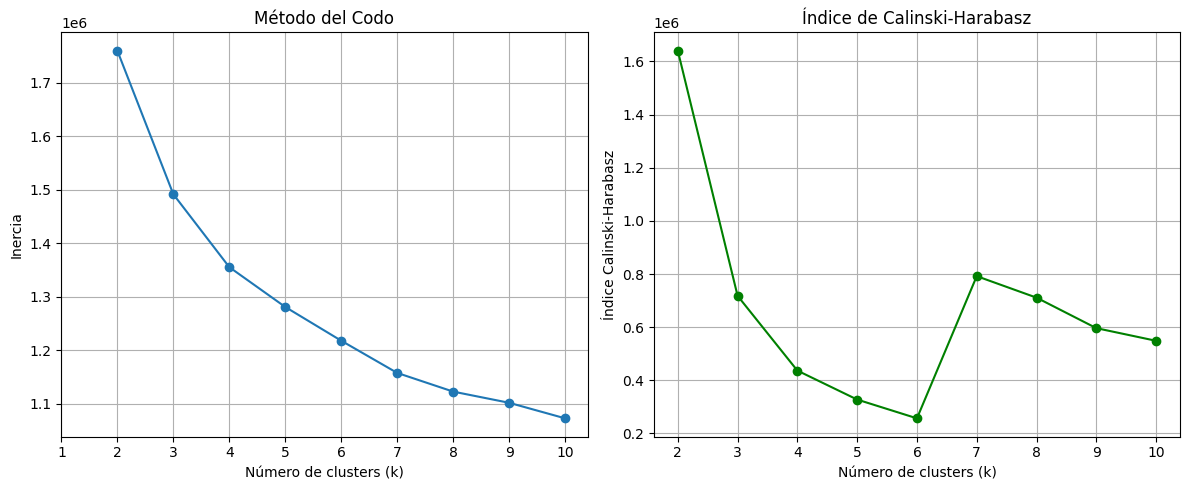

In [ ]:
# Variables para almacenar resultados
inertias = []
calinski_harabasz_scores = []
K = range(2, 11)  # El √≠ndice requiere al menos 2 clusters

# Iterar por cada valor de k
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    pipeline_tmp = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocesamiento (definido previamente)
        ('kmeans', kmeans)
    ])
    pipeline_tmp.fit(df_kmeans)
    labels = pipeline_tmp.named_steps['kmeans'].labels_  # Obtener etiquetas del modelo

    # Calcular m√©tricas
    inertias.append(kmeans.inertia_)
    calinski_harabasz_scores.append(calinski_harabasz_score(df_kmeans, labels))

# Gr√°ficos del M√©todo del Codo y Calinski-Harabasz
plt.figure(figsize=(12, 5))

# Subgr√°fico 1: M√©todo del Codo
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), [None] + inertias, marker='o', linestyle='-')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Inercia')
plt.title('M√©todo del Codo')
plt.xticks(range(1, 11))
plt.grid(True)

# Subgr√°fico 2: Calinski-Harabasz
plt.subplot(1, 2, 2)
plt.plot(K, calinski_harabasz_scores, marker='o', linestyle='-', color='green')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('√çndice Calinski-Harabasz')
plt.title('√çndice de Calinski-Harabasz')
plt.xticks(K)
plt.grid(True)

plt.tight_layout()
plt.show()



1. **M√©todo del Codo**:
   - El "codo" parece estar en \(k = 3\), donde la reducci√≥n de la inercia comienza a estabilizarse.
   - \(k = 3\) podr√≠a ser un buen equilibrio entre simplicidad y calidad del agrupamiento.

2. **√çndice de Calinski-Harabasz**:
   - El valor m√°ximo se alcanza en \(k = 2\), indicando una fuerte cohesi√≥n y separaci√≥n.
   - Sin embargo, hay un segundo pico m√°s peque√±o en \(k = 7\), que podr√≠a ser una opci√≥n alternativa.

**Conclusi√≥n:**

La elecci√≥n √≥ptima parece ser \(k = 2\) seg√∫n el **Silhouette Score** y el **√çndice de Calinski-Harabasz**. Sin embargo, \(k = 3\) podr√≠a considerarse como una alternativa v√°lida si priorizas una mayor granularidad en el agrupamiento, tal como sugiere el **M√©todo del Codo**.



**Silhouette Score**

In [ ]:
df_kmeans_transformed = preprocessor.fit_transform(df_kmeans).toarray()

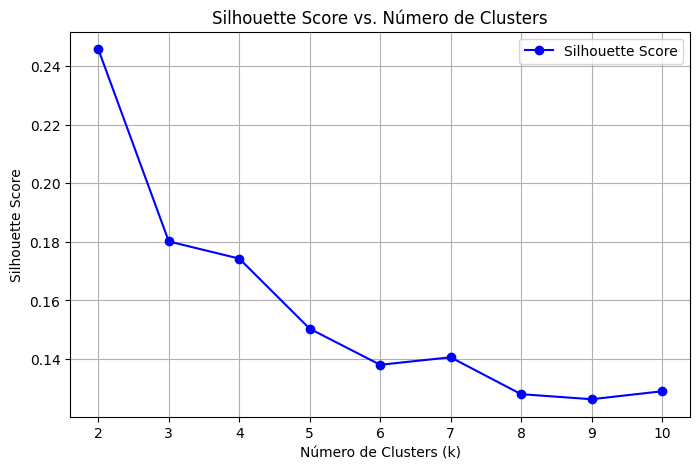

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

# Submuestreo del 10% para el c√°lculo del Silhouette Score
sample_fraction = 0.1
silhouette_scores = []
k_values = list(range(2, 11))  # Valores de k a evaluar

# Transformar datos y convertir a array denso
df_kmeans_transformed = preprocessor.fit_transform(df_kmeans).toarray()

# Iterar sobre los valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    pipeline_tmp = Pipeline(steps=[('kmeans', kmeans)])

    # Ajustar modelo en datos transformados
    pipeline_tmp.fit(df_kmeans_transformed)
    labels = pipeline_tmp.named_steps['kmeans'].labels_

    # Seleccionar √≠ndices aleatorios para submuestreo
    np.random.seed(42)  # Asegura reproducibilidad
    sample_indices = np.random.choice(df_kmeans_transformed.shape[0],
                                      size=int(df_kmeans_transformed.shape[0] * sample_fraction),
                                      replace=False)

    # Extraer la muestra
    sample_data = df_kmeans_transformed[sample_indices]
    sample_labels = labels[sample_indices]

    # Calcular Silhouette Score en la muestra
    silhouette_scores.append(silhouette_score(sample_data, sample_labels))

# üìä Gr√°fico del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. N√∫mero de Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


 A partir de los datos observados,se observa lo diguiente:

1. **M√°ximo en k=2**:
   - La puntuaci√≥n m√°s alta ocurre con **k=2**, lo que indica que los datos est√°n mejor representados por dos cl√∫steres seg√∫n esta m√©trica.

2. **Disminuci√≥n dr√°stica entre k=2 y k=3**:
   - El Silhouette Score disminuye significativamente cuando se pasa de **k=2** a **k=3**, lo que sugiere que agregar m√°s cl√∫steres no mejora la cohesi√≥n de los cl√∫steres.


**Visualizar los clusters para k=2 y k=3 a trav√©s de la t√©cnica  PCA (An√°lisis de Componentes Principales).**

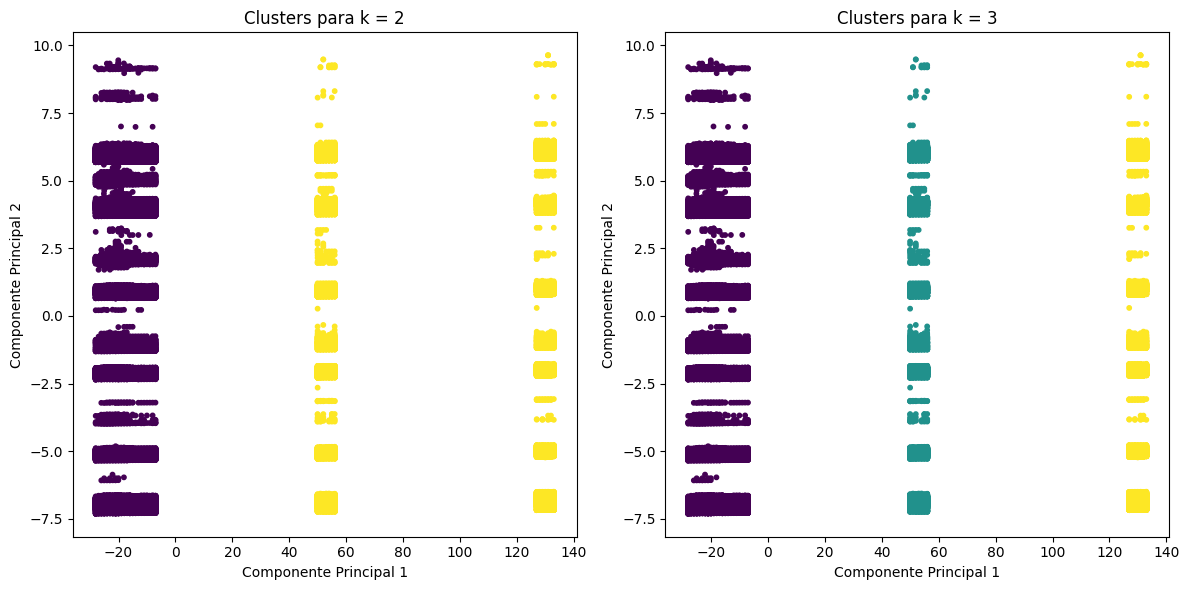

In [ ]:
# Definir el rango de clusters que vamos a graficar
cluster_values = [2, 3]

# Reducir la dimensionalidad de los datos para visualizaci√≥n
pca = PCA(n_components=2)
df_kmeans_reduced = pca.fit_transform(df_kmeans)

plt.figure(figsize=(12, 6))

# Visualizar clusters para cada valor de k
for i, k in enumerate(cluster_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_kmeans)

    # Crear el subgr√°fico
    plt.subplot(1, 2, i)
    plt.scatter(df_kmeans_reduced[:, 0], df_kmeans_reduced[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f'Clusters para k = {k}')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()


1. **Gr√°fico \(k = 2\)**:
   - Se observa una clara separaci√≥n entre los dos clusters (representados por los colores morado y amarillo).
   - Esto coincide con el **Silhouette Score**, que indic√≥ que \(k = 2\) tiene la mejor separaci√≥n y cohesi√≥n.

2. **Gr√°fico \(k = 3\)**:
   - Aparece un tercer cluster. Sin embargo, el nuevo cluster parece estar "dividiendo" un cluster previo en \(k = 2\), en lugar de identificar un patr√≥n claramente distinto.
   - Esto podr√≠a indicar que \(k = 3\) no mejora significativamente la separaci√≥n ni la calidad de los clusters.

**Conclusi√≥n:**
- **\(k = 2\)** parece ser la mejor elecci√≥n, ya que tiene una clara separaci√≥n y est√° respaldado por el **Silhouette Score** y el **√çndice de Calinski-Harabasz**.

**Modelo con el punto √≥ptimo**` K=2`

Caracter√≠sticas promedio por cluster:
              Price  Days Before Departure  Month_departure  Flight Duration  \
Cluster                                                                        
0        364.890211              14.535557         7.000000         9.393839   
1        262.620795             123.876411        10.433951         9.352229   

         Cluster  
Cluster           
0            0.0  
1            1.0  

Promedio de la variable 'Price' por cluster:
Cluster
0    364.890211
1    262.620795
Name: Price, dtype: float64


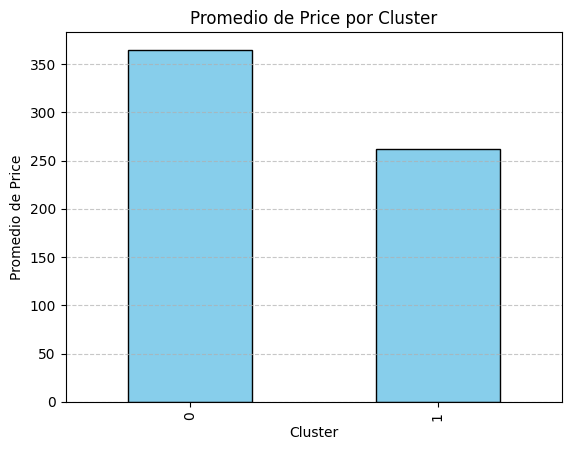

In [ ]:
# Elegir el valor de k √≥ptimo (en este caso, k=2)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_kmeans)

# 1. Caracter√≠sticas promedio por cluster
# Seleccionar solo columnas num√©ricas para calcular promedios
numeric_columns = df.select_dtypes(include=['number']).columns
cluster_means = df.groupby('Cluster')[numeric_columns].mean()

# Mostrar resultados de las caracter√≠sticas promedio
print("Caracter√≠sticas promedio por cluster:")
print(cluster_means)

# 2. Impacto de los clusters en una variable espec√≠fica (ejemplo: 'Price')
if 'Price' in df.columns:
    price_by_cluster = df.groupby('Cluster')['Price'].mean()
    print("\nPromedio de la variable 'Price' por cluster:")
    print(price_by_cluster)

    # Graficar el impacto de los clusters en 'Price'
    price_by_cluster.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Promedio de Price por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Promedio de Price')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("\nLa columna 'Price' no est√° disponible en los datos.")


#### 1. **Caracter√≠sticas promedio por cluster**:
- **Cluster 0**:
  - **Precio promedio**: **364.89** (m√°s alto).
  - **D√≠as antes de la salida**: **14.53** (baja antelaci√≥n).
  - **Mes de salida promedio**: **7.00 (julio)**.
  - **Duraci√≥n del vuelo**: **9.39** (similar al otro cluster).

- **Cluster 1**:
  - **Precio promedio**: **262.62** (m√°s bajo).
  - **D√≠as antes de la salida**: **123.88** (alta antelaci√≥n).
  - **Mes de salida promedio**: **10.43 (octubre)**.
  - **Duraci√≥n del vuelo**: **9.35** (pr√°cticamente igual al Cluster 0).

#### 2. **Promedio de la variable 'Price' por cluster**:
- El **precio promedio** es significativamente m√°s alto para el **Cluster 0**, lo que sugiere que reservar vuelos con poca antelaci√≥n (alrededor de 14 d√≠as) est√° asociado a precios m√°s altos.
- El **Cluster 1**, con una antelaci√≥n promedio de 123 d√≠as, tiene precios mucho m√°s bajos.

---

### Conclusi√≥n:
- Este resultado destaca una relaci√≥n clara entre la antelaci√≥n en la reserva y el precio promedio:
  - **Cluster 0** podr√≠a representar viajeros que reservan en el √∫ltimo minuto o para eventos inesperados, donde el precio tiende a ser m√°s alto.
  - **Cluster 1** representa viajeros planificados que reservan con mucha antelaci√≥n, logrando precios m√°s econ√≥micos.

- **Duraci√≥n del vuelo**: La duraci√≥n promedio es muy similar entre los clusters, lo que indica que este factor no tiene un impacto significativo en la segmentaci√≥n.




Por tanto, despu√©s de realizar este an√°lisis podr√≠amos enfocarnos en promociones o descuentos en viajeros de **Cluster 0** para incentivar reservas anticipadas y evitar precios altos de √∫ltima hora.

Y para el **Cluster 1**, se puede mantener precios competitivos pero aseguranos de optimizar la rentabilidad al captar viajeros planificados.


## **MODELO DE REGRESI√ìN**

- Aplicar un modelo de regresi√≥n (lineal o polin√≥mico) para predecir una
variable continua a partir de una o varias variables independientes.
- Evaluar la precisi√≥n y eficacia del modelo a trav√©s de m√©tricas adecuada

----


### An√°lisis previo

In [ ]:
df2.columns

Index(['Departure Airport', 'Arrival Airport', 'Number Of Stops', 'Price',
       'Days Before Departure', 'Day of Week_departure', 'Season_departure',
       'Flight Duration', 'Cabin Group', 'Airline'],
      dtype='object')

Obvervar las correlaciones que tienen nuestras variables epxlicativas con las variable objetivo

Correlaci√≥n con 'Price':
Price                    1.000000
Cabin Group              0.386726
Number Of Stops          0.365529
Flight Duration          0.288016
Arrival Airport          0.024492
Season_departure         0.009197
Airline                 -0.024234
Departure Airport       -0.047339
Day of Week_departure   -0.175833
Days Before Departure   -0.207904
Name: Price, dtype: float64


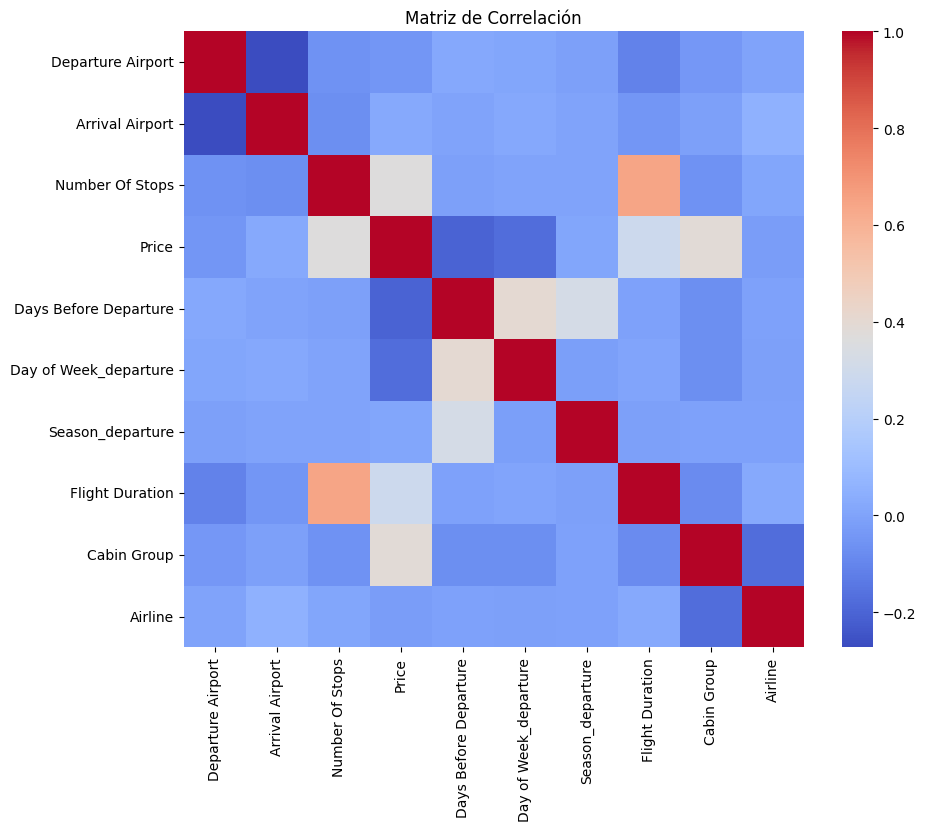

In [ ]:
# Calcular matriz de correlaci√≥n
correlation_matrix = df2.corr()

# Mostrar correlaci√≥n con la variable objetivo (Price)
target_corr = correlation_matrix['Price'].sort_values(ascending=False)
print("Correlaci√≥n con 'Price':")
print(target_corr)

# Visualizar la matriz de correlaci√≥n
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de Correlaci√≥n')
plt.show()


**Variables con correlaci√≥n positiva:**
* Cabin Group (0.3867): La clase de cabina tiene la correlaci√≥n m√°s alta. Esto indica que los boletos en clases superiores (business, primera clase) son m√°s caros.
* Number Of Stops (0.3655): A m√°s escalas, mayor precio. Aunque los vuelos directos suelen ser m√°s costosos, algunos itinerarios con muchas escalas pueden incrementar el costo debido a rutas poco convencionales o mayor demanda.
* Flight Duration (0.2336): Los vuelos m√°s largos tienden a ser m√°s caros, lo que tiene sentido dado el mayor consumo de combustible y costos operativos.
Variables con correlaci√≥n cercana a cero (relaci√≥n d√©bil con el precio)
* Arrival Airport (0.0245): El aeropuerto de llegada tiene una correlaci√≥n muy baja con el precio, lo que sugiere que no hay un impacto claro.
* Season_departure (0.0092): La estaci√≥n del a√±o en la que se viaja tiene un impacto casi nulo, lo cual es inusual. Puede deberse a que los efectos de temporada est√°n capturados en otras variables como Days Before Departure.

**Variables con correlaci√≥n negativa:**
* Airline (-0.0242): La aerol√≠nea tiene un impacto leve y negativo. Esto podr√≠a indicar que aerol√≠neas m√°s econ√≥micas dominan en los datos.
* Departure Airport (-0.0473): El aeropuerto de salida tiene una peque√±a relaci√≥n negativa con el precio. Tal vez algunos aeropuertos de origen tengan precios m√°s bajos debido a mayor competencia o volumen de vuelos.
* Day of Week_departure (-0.1758): Salir ciertos d√≠as de la semana (probablemente entre semana) tiende a reducir el precio.
Days Before Departure (-0.2079): Comprar con m√°s anticipaci√≥n reduce el precio, lo cual es un comportamiento t√≠pico en la industria a√©rea.


**Conclusi√≥n**

La clase de cabina y el n√∫mero de escalas son los principales factores que elevan el precio.

Comprar con anticipaci√≥n y viajar ciertos d√≠as de la semana tiende a reducir el costo.

Variables como el aeropuerto de llegada, la aerol√≠nea y la estaci√≥n del a√±o tienen poco impacto en el precio.

**An√°lisis de variables categ√≥ricas**

Para variables categ√≥ricas, evaluamos la relaci√≥n entre cada categor√≠a y su variable objetivo a trav√©s del uso de ANOVA


In [ ]:
# Variables categ√≥ricas detectadas para ANOVA
categorical_features_encoded = ['Departure Airport', 'Arrival Airport', 'Number Of Stops',
                                 'Day of Week_departure', 'Season_departure', 'Cabin Group']

# Resultados de ANOVA
anova_results_encoded = []

# Calcular ANOVA para cada variable categ√≥rica
for cat in categorical_features_encoded:
    groups = [group['Price'].values for _, group in df2.groupby(cat, observed=False) if len(group) > 1]

    if len(groups) > 1:  # Verifica que hay suficientes grupos
        try:
            f_stat, p_value = stats.f_oneway(*groups)
            anova_results_encoded.append({'Variable': cat, 'F-Statistic': f_stat, 'P-Value': p_value})
        except Exception as e:
            anova_results_encoded.append({'Variable': cat, 'F-Statistic': None, 'P-Value': None})
            print(f"Error al procesar la variable {cat}: {e}")
    else:
        anova_results_encoded.append({'Variable': cat, 'F-Statistic': None, 'P-Value': None})

# Convertir resultados a DataFrame
anova_df_encoded = pd.DataFrame(anova_results_encoded)
anova_df_encoded = anova_df_encoded.sort_values(by='P-Value', na_position='last')

# Mostrar resultados al usuario
anova_df_encoded

Variable   F-Statistic  P-Value
0      Departure Airport   2569.733182      0.0
1        Arrival Airport   1933.296126      0.0
2        Number Of Stops  18222.750464      0.0
3  Day of Week_departure   3780.840436      0.0
4       Season_departure   7408.789317      0.0
5            Cabin Group  61265.495127      0.0

Al ver los resultados, observamos que todas las variables categ√≥ricas analizadas tienen un impacto significativo en el precio, por lo que deben ser incluidas en el modelo.

<ipython-input-82-4d4c1ed1d698>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[col] = df_subset[col].astype('category').cat.codes


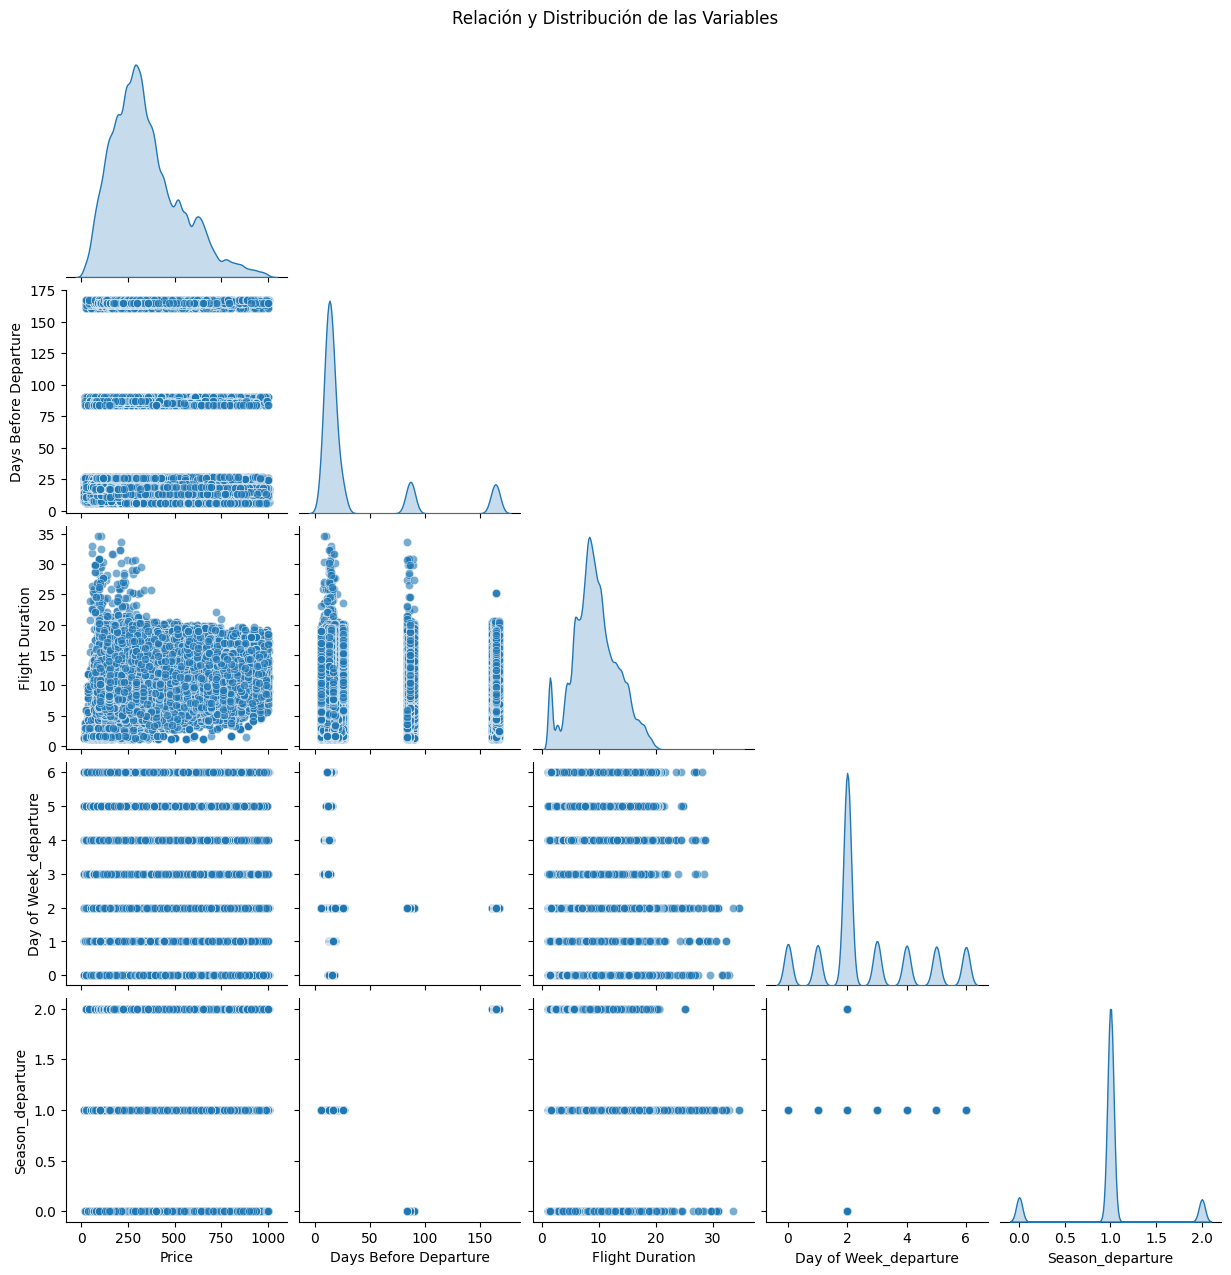

In [ ]:
# Seleccionar un subconjunto de variables para visualizar (variables num√©ricas y categ√≥ricas codificadas)
selected_columns = ['Price', 'Days Before Departure', 'Flight Duration', 'Number Of Stops']
categorical_columns = ['Day of Week_departure', 'Season_departure']

# Combinar variables num√©ricas y categ√≥ricas codificadas
df_subset = df[selected_columns + categorical_columns]

# Convertir variables categ√≥ricas a num√©ricas para facilitar el an√°lisis
for col in categorical_columns:
    df_subset[col] = df_subset[col].astype('category').cat.codes

# Crear el pairplot
sns.pairplot(df_subset, diag_kind='kde', kind='scatter', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Relaci√≥n y Distribuci√≥n de las Variables", y=1.02)
plt.show()


1. **Distribuci√≥n de las variables individuales**:
   - **`Price`**: Tiene una distribuci√≥n sesgada hacia la derecha, lo que sugiere que la mayor√≠a de los precios est√°n en rangos m√°s bajos, pero hay algunos valores muy altos.
   - **`Days Before Departure`**: Presenta picos claros, posiblemente debido a valores discretos espec√≠ficos como 30, 60 o 90 d√≠as antes de la salida.
   - **`Flight Duration`**: Parece tener una distribuci√≥n unimodal concentrada alrededor de 9-10 horas.
   - **`Day of Week_departure`** y **`Season_departure`**: Estas variables est√°n codificadas y parecen mostrar distribuciones discretas.

2. **Relaciones entre las variables**:
   - **`Price` y `Days Before Departure`**:
     - Hay una relaci√≥n negativa: precios m√°s altos est√°n asociados con reservas hechas m√°s cerca de la fecha de salida.
   - **`Price` y `Flight Duration`**:
     - Parece no haber una relaci√≥n clara entre el precio y la duraci√≥n del vuelo.
   - **`Price` y `Day of Week_departure`**:
     - Los precios no parecen variar mucho seg√∫n el d√≠a de la semana.
   - **`Price` y `Season_departure`**:
     - Aunque hay una ligera variaci√≥n entre estaciones, la relaci√≥n no es pronunciada.

3. **Relaciones notables**:
   - **`Days Before Departure`** y otras variables:
     - Muestra patrones discretos, especialmente con las estaciones y d√≠as de la semana, lo que indica que hay comportamientos espec√≠ficos seg√∫n el tiempo de anticipaci√≥n en la reserva.


### 1: MODELO DE REGRESI√ìN LINEAL

`Price` es la variable objetivo.

**CONSTRUCCI√ìN DEL MODELO**

In [ ]:
df2.columns

Index(['Departure Airport', 'Arrival Airport', 'Number Of Stops', 'Price',
       'Days Before Departure', 'Day of Week_departure', 'Season_departure',
       'Flight Duration', 'Cabin Group', 'Airline'],
      dtype='object')

In [ ]:
# Definir variables predictoras y objetivo
X = df2.drop(columns=['Price'])
y = df2['Price']

# Identificar variables categ√≥ricas y num√©ricas
categorical_features = ['Departure Airport', 'Arrival Airport', 'Day of Week_departure', 'Season_departure', 'Airline', 'Cabin Group']
numerical_features = ['Number Of Stops', 'Days Before Departure', 'Flight Duration']

# Preprocesamiento: One-Hot Encoding y Normalizaci√≥n
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Crear pipeline con Regresi√≥n Lineal
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluaci√≥n del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [ ]:
df_results = pd.DataFrame({
    "M√©trica": ["Error Absoluto Medio (MAE)", "Ra√≠z del Error Cuadr√°tico Medio (RMSE)", "Coeficiente de Determinaci√≥n (R¬≤)"],
    "Valor": [f"{mae:.4f}", f"{rmse:.4f}", f"{r2:.4f}"]
})

print("Resultados del modelo: REGRESI√ìN LINEAL ")
print("")
df_results


Resultados del modelo: REGRESI√ìN LINEAL 



M√©trica     Valor
0              Error Absoluto Medio (MAE)   85.4276
1  Ra√≠z del Error Cuadr√°tico Medio (RMSE)  111.5188
2       Coeficiente de Determinaci√≥n (R¬≤)    0.6355

**Error Absoluto Medio (MAE)** = 85.43

En promedio, el modelo se equivoca en $85 en la predicci√≥n del precio.


**Ra√≠z del Error Cuadr√°tico Medio (RMSE)** = 111.52

Confirma que el error sigue bajo.


**Coeficiente de Determinaci√≥n (R¬≤)** = 0.6355

Indica que el modelo explica el 63.55% de la variabilidad del precio.


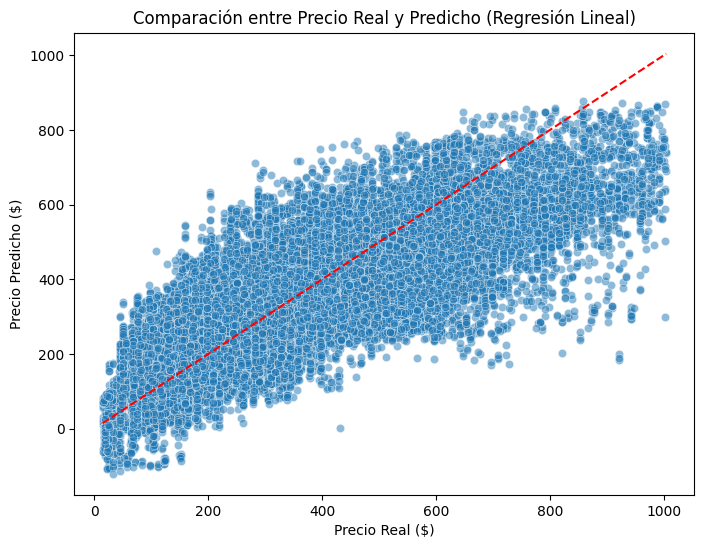

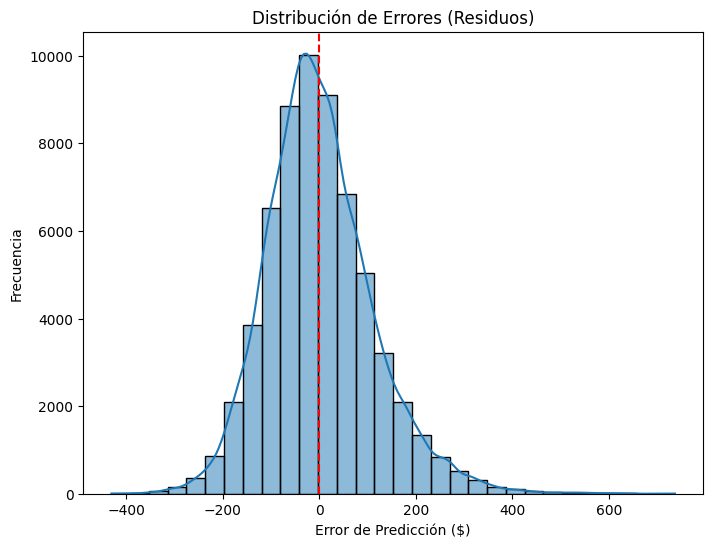

In [ ]:
# Visualizaci√≥n 1: Comparaci√≥n entre precios reales y predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # L√≠nea perfecta
plt.xlabel("Precio Real ($)")
plt.ylabel("Precio Predicho ($)")
plt.title("Comparaci√≥n entre Precio Real y Predicho (Regresi√≥n Lineal)")
plt.show()

# Visualizaci√≥n 2: Distribuci√≥n de errores (residuos)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')  # L√≠nea en 0 para referencia
plt.xlabel("Error de Predicci√≥n ($)")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de Errores (Residuos)")
plt.show()

**1. Distribuci√≥n de Errores (Residuos)**
  - Los errores (residuos) est√°n distribuidos de manera aproximadamente sim√©trica alrededor de **0**, lo que es una buena se√±al de que el modelo no tiene sesgo sistem√°tico.
  - Sin embargo, parece haber una leve cola hacia la derecha, lo que indica que hay algunas predicciones significativamente subestimadas.
  - La forma de la distribuci√≥n es **casi normal**, lo que sugiere que las suposiciones de regresi√≥n lineal est√°n siendo cumplidas razonablemente bien.

- **Interpretaci√≥n**:
  - El modelo lineal est√° funcionando bien en capturar la relaci√≥n entre las variables predictoras y el precio.
  - Los errores grandes (positivos o negativos) podr√≠an ser casos especiales, como vuelos con precios extremos debido a eventos o circunstancias espec√≠ficas.

**2. Comparaci√≥n entre Precio Real y Predicho**
  - Los puntos est√°n distribuidos alrededor de la l√≠nea roja (diagonal), lo que indica que las predicciones del modelo son razonablemente precisas para la mayor√≠a de los datos.
  - Sin embargo, se observa una mayor dispersi√≥n en los valores m√°s altos de precios reales, lo que indica que el modelo tiene mayor dificultad para predecir precios altos con precisi√≥n.
  - Hay un agrupamiento visible en precios bajos, lo cual puede reflejar una mayor cantidad de vuelos econ√≥micos.

- **Interpretaci√≥n**:
  - El modelo capta bien la relaci√≥n lineal en el rango intermedio de precios, pero tiene dificultades para capturar la complejidad de los vuelos con precios muy altos o muy bajos.
  - Esto podr√≠a indicar que los precios extremos est√°n influenciados por factores adicionales que el modelo no est√° considerando (ej. eventos especiales, promociones).

### 2: **MODELO POLINOMIAL**

En la imagen del **pairplot**, se pueden observar que la √∫nica relaci√≥n que muestra un posible comportamiento no lineal es **`Price` vs `Days Before Departure`**.

Estas variables tienen una relaci√≥n negativa evidente: los precios tienden a ser m√°s altos cuando los vuelos se reservan con menos d√≠as de antelaci√≥n. Parece que esta relaci√≥n podr√≠a no ser perfectamente lineal. Existe una disminuci√≥n pronunciada al principio (reservas cercanas a la fecha de salida) y luego una estabilizaci√≥n para reservas m√°s lejanas. Esto sugiere que un modelo polinomial de grado 2 podr√≠a ser √∫til aqu√≠.

Es por eso que se emplear√° un modelo polinomial de grado 2 para capturar la curvatura en esta relaci√≥n.



In [ ]:
# Crear un modelo de regresi√≥n polinomial de grado 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Pipeline con preprocesador, transformaci√≥n polin√≥mica y regresi√≥n lineal
poly_model = Pipeline([
    ('preprocessor', preprocessor),
    ('poly_features', poly_features),
    ('regressor', LinearRegression())
])

# Entrenar modelo polinomial
poly_model.fit(X_train, y_train)

# Predicciones
y_pred_poly = poly_model.predict(X_test)

# Evaluaci√≥n del modelo polinomial
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

# Resultados del modelo polinomial
mae_poly, rmse_poly, r2_poly


(65.23475364949886, 87.50181936748417, 0.7755932536800655)

In [ ]:
df_results = pd.DataFrame({
    "M√©trica": ["Error Absoluto Medio (MAE)", "Ra√≠z del Error Cuadr√°tico Medio (RMSE)", "Coeficiente de Determinaci√≥n (R¬≤)"],
    "Valor": [f"{mae_poly:.4f}", f"{rmse_poly:.4f}", f"{r2_poly:.4f}"]
})

print("Resultados del modelo: REGRESI√ìN POLINOMIAL ")
print("")
df_results

Resultados del modelo: REGRESI√ìN POLINOMIAL 



M√©trica    Valor
0              Error Absoluto Medio (MAE)  65.2348
1  Ra√≠z del Error Cuadr√°tico Medio (RMSE)  87.5018
2       Coeficiente de Determinaci√≥n (R¬≤)   0.7756

1. **Error Absoluto Medio (MAE) = 65.23**  
   - En promedio, el modelo se equivoca en **$65**, mejor que el modelo lineal (**$85.43**).  
   - Indica una mejora significativa en la precisi√≥n.

2. **Ra√≠z del Error Cuadr√°tico Medio (RMSE) = 87.50**  
   - M√°s bajo que el modelo lineal (**$111.52**), lo que indica que tambi√©n se han reducido los errores grandes (outliers).

3. **Coeficiente de Determinaci√≥n (R¬≤) = 0.7756**  
   - Explica el **77.56% de la variabilidad** del precio.  
   - Mucho mejor que el modelo lineal (**63.55%**), lo que sugiere que la relaci√≥n entre variables y precio es **no lineal**.


**Conclusi√≥n** :

**El modelo polinomial es mejor que el lineal**, ya que tiene:
- **Menor error absoluto (MAE y RMSE)**.
- **Mayor capacidad explicativa (R¬≤ m√°s alto)**.

Esto indica que la relaci√≥n entre **las variables y el precio de los vuelos es m√°s compleja que una simple l√≠nea recta** y que agregar t√©rminos polinomiales ayuda a capturar mejor las tendencias.


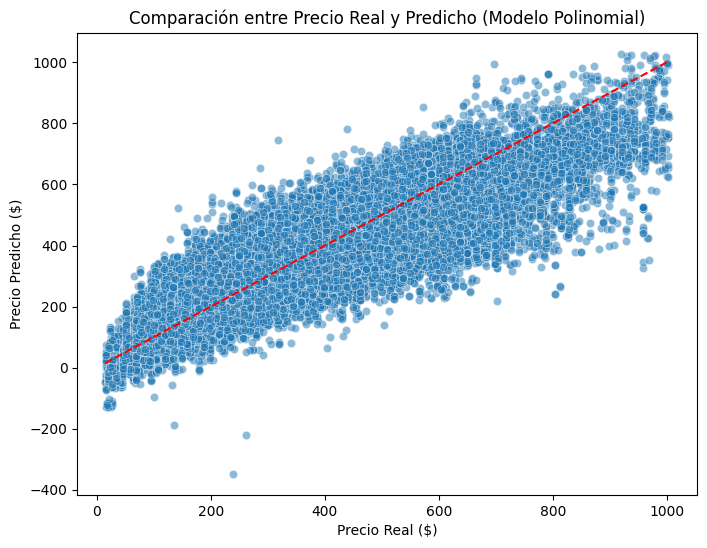

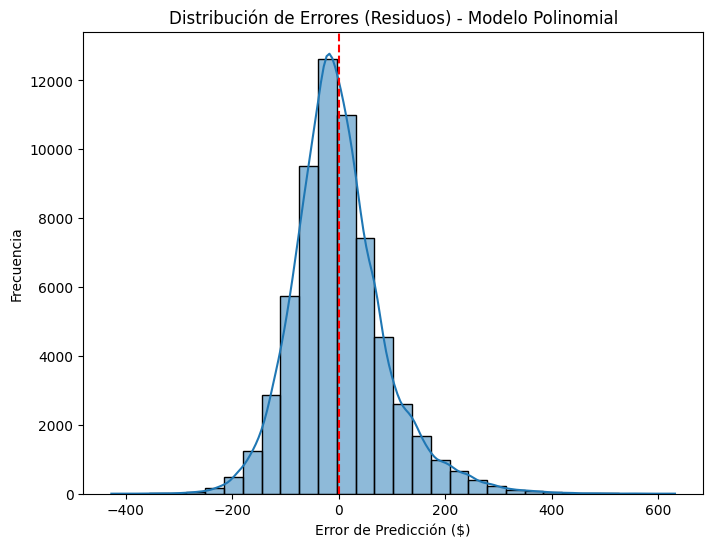

In [ ]:
# Comparaci√≥n entre precios reales y predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # L√≠nea perfecta
plt.xlabel("Precio Real ($)")
plt.ylabel("Precio Predicho ($)")
plt.title("Comparaci√≥n entre Precio Real y Predicho (Modelo Polinomial)")
plt.show()

# Distribuci√≥n de errores (residuos)
residuals = y_test - y_pred_poly
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')  # L√≠nea en 0 para referencia
plt.xlabel("Error de Predicci√≥n ($)")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de Errores (Residuos) - Modelo Polinomial")
plt.show()


**1. Distribuci√≥n de Errores (Residuos)**
  - La distribuci√≥n de los errores es **sim√©trica** y est√° centrada alrededor de 0, lo que indica que el modelo no tiene un sesgo sistem√°tico.
  - Hay una ligera cola hacia valores positivos (errores de subestimaci√≥n), lo que puede significar que el modelo tiene dificultades para predecir precios altos.
  - La forma de la distribuci√≥n se asemeja a una distribuci√≥n normal, lo que respalda la validez de las suposiciones del modelo.

- **CONCLUSI√ìN**:
  - Esto indica que el modelo polinomial est√° funcionando bien, aunque podr√≠a haber margen de mejora en los extremos (precios muy altos o bajos).


**2. Comparaci√≥n entre Precio Real y Predicho**
  - La mayor√≠a de los puntos se agrupan cerca de la l√≠nea roja (predicci√≥n perfecta), lo que muestra que el modelo tiene una buena precisi√≥n general.
  - A medida que los precios reales aumentan, hay mayor dispersi√≥n en las predicciones, lo que indica que el modelo tiene m√°s dificultad para predecir correctamente los precios altos.


- **Conclusi√≥n**:
  - El modelo polinomial logra capturar la relaci√≥n entre las variables predictoras y el precio razonablemente bien, aunque con errores m√°s grandes en los extremos.


**Comparaci√≥n entre el Modelo Lineal y el Modelo Polinomial**

**1. Distribuci√≥n de Errores (Residuos)**

**Modelo Lineal**:
- La distribuci√≥n es sim√©trica y se aproxima a una distribuci√≥n normal.
- Sin embargo, presenta colas m√°s pronunciadas, especialmente en los errores positivos, indicando que hay m√°s errores al predecir precios altos.
- Tiene m√°s dispersi√≥n en general, lo que sugiere menor precisi√≥n.

**Modelo Polinomial**:
- La distribuci√≥n sigue siendo sim√©trica y normal, pero las colas son menos pronunciadas que en el modelo lineal.
- Esto indica que el modelo polinomial mejora las predicciones en los extremos, especialmente para precios altos.

**Conclusi√≥n**:
El modelo polinomial gestiona mejor los errores y tiene una distribuci√≥n m√°s concentrada, lo que indica una mejora en precisi√≥n.

---
**2. Comparaci√≥n entre Precio Real y Predicho**

**Modelo Lineal**:
- Los puntos est√°n agrupados cerca de la l√≠nea roja en el rango de precios medios, pero hay mayor dispersi√≥n en precios altos y bajos.
- Tiene mayor dificultad para capturar patrones en los extremos, lo que genera errores m√°s grandes.

**Modelo Polinomial**:
- Los puntos est√°n mejor alineados con la l√≠nea roja en todos los rangos de precios.
- Aunque hay algo de dispersi√≥n en precios altos, es menor comparado con el modelo lineal.

**Conclusi√≥n**:
El modelo polinomial captura patrones m√°s complejos y mejora las predicciones, especialmente en precios extremos.


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cross Validation para modelo lineal
linear_scores = cross_val_score(model, X, np.log1p(y), cv=5, scoring='neg_mean_squared_error')
linear_rmse = np.sqrt(-linear_scores.mean())

# Cross Validation para modelo polinomial
poly_scores = cross_val_score(poly_model, X, np.log1p(y), cv=5, scoring='neg_mean_squared_error')
poly_rmse = np.sqrt(-poly_scores.mean())

print(f"Modelo Lineal - RMSE (Cross Validation): {linear_rmse}")
print(f"Modelo Polinomial - RMSE (Cross Validation): {poly_rmse}")


Modelo Lineal - RMSE (Cross Validation): 0.35307973508371604
Modelo Polinomial - RMSE (Cross Validation): 0.2652476667469316


**An√°lisis de los Resultados de Cross Validation**

**1. Modelo Lineal: RMSE = 0.3531**
- El modelo lineal tiene un error promedio m√°s alto en comparaci√≥n con el modelo polinomial.
- Esto confirma que el modelo lineal no es capaz de capturar completamente las relaciones complejas entre las variables predictoras y el precio.

**2. Modelo Polinomial: RMSE = 0.2652**
- El modelo polinomial tiene un error m√°s bajo, lo que indica que est√° capturando mejor las relaciones no lineales en los datos.
- Esto respalda los resultados previos: el modelo polinomial es m√°s adecuado para este problema.

---

**CONCLUSI√ìN**
1. **Modelo Lineal**:
   - Es una buena opci√≥n inicial, pero sus limitaciones son evidentes en este caso debido a las relaciones no lineales en los datos.

2. **Modelo Polinomial**:
   - Al incluir t√©rminos polin√≥micos (grado 2), este modelo es m√°s flexible y logra un mejor ajuste, reflejado en su menor RMSE.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar instalaci√≥n de scikit-learn
!pip install --upgrade scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Asegurar que mean_squared_error no ha sido sobrescrito
del mean_squared_error
from sklearn.metrics import mean_squared_error

# Cargar el dataset limpio
df = df2.copy()

# Separar variables num√©ricas y categ√≥ricas
num_features = ['Days Before Departure', 'Flight Duration', 'Number Of Stops']
cat_features = ['Departure Airport', 'Arrival Airport', 'Airline', 'Cabin Group']

# Definir la variable objetivo
target = 'Price'

# Divisi√≥n de datos en train y test
X = df[num_features + cat_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: Escalar num√©ricas y One-Hot Encoding en categ√≥ricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Modelos a evaluar
models = {
    'Regresi√≥n Lineal': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluaci√≥n de modelos
results = []
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calcular RMSE manualmente sin usar `squared=False`
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({'Modelo': name, 'RMSE': rmse, 'MAE': mae, 'R¬≤': r2})

# Convertir a DataFrame para mostrar resultados
results_df = pd.DataFrame(results)

# Mostrar tabla de comparaci√≥n de modelos

results_df